# Exploration of the Labour Dynamics and Wealth of South Africa

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.gettyimages.com/photos/varied-new-south-african-mandela-banknotes-with-coins-picture-id168637625?s=612x612")

#### This exploration introduces a new perspective into the wealth of individual South Africans.

We will briefly set the context by looking at the demographics of the nation. A few key features that define the population are displayed and explored. The focus will shift over to observe the wealth of the people. We look at spending habits and which subsets of people own what. Spending habits and ownership of items are however dependant on income.

Income, on the other hand, is dependant on many other factors. We explore the factors which has the strongest influences on income of people. 
The subset of people who generate the largest income is controversial and is not properly identified. The goal of this exploration is to generate a hypothesis regarding the income of individuals.

The aim is to identify the subset of people that generate the most income with regards to 
-  Level of Education
-  Industry of occupation
-  Occupation
-  Age
-  Location (province)
-  Race
-  Study Field


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

## Demographics

To provide context of South Africa, the population is explored. Firstly it is important to look at the growth of a country and to see which age groups has the strongest growth. The distribution of the population over age groups reveals a lot about a nation. Workforce strength, health and life expectancy are some of the features that can be derived.

### Population

 The growth rate over the past 7 years is: 14.112090640639408 %


Year        Male       Female       Total
0  2011    24515036     26071721    50586757
1  2013    25823270     27158721    52981991
2  2014  2.6366e+07  2.76359e+07  5.4002e+07
3  2015    26878289     28078631    54956920
4  2016    27379728     28529137    55908865
5  2017    27620642     28901306    56521948
6  2018    28180101     29545505    57725606

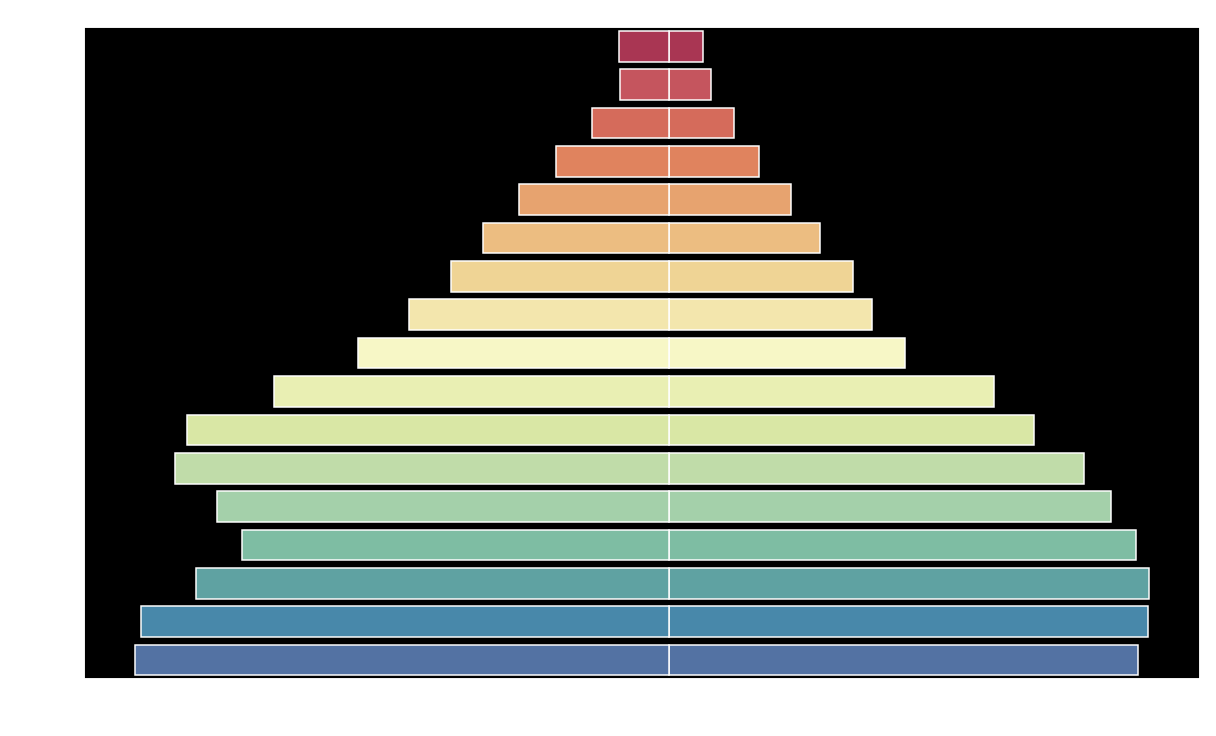

In [3]:
asp = pd.read_excel('age_sex_pop.xlsx')
asp_total = asp[asp['Variable'] == 'Total']
asp_total = asp_total.transpose()
asp_total=asp_total[2:].reset_index()
asp_total.columns = ['Year','Male','Female','Total']
age_totals = asp[(asp['Sex']=='Total') & (asp['Variable'] != 'Total')]
age_totals_melt = age_totals.melt(id_vars = ['Variable'],value_vars = ['2011','2013','2014','2015','2016','2017','2018'])
years = ['2011','2013','2014','2015','2016','2017','2018']


asp_m = asp[asp['Sex'] == 'Total']
asp_m = asp_m[['Variable','2011','2013','2014','2015','2016','2017','2018']][1:].reset_index(drop = True)
asp_m['2018'] = -asp_m['2018']
b= asp_m.iloc[3]
c = asp_m.iloc[4]
temp = asp_m.iloc[3].copy()
asp_m.iloc[3] = c
asp_m.iloc[4] = temp

plt.figure(figsize = (20,12))
plt.title('Distribution of Age in 2011')
sns.barplot(y = 'Variable',x = '2011',data = asp_m,orient = 'h',palette = 'Spectral')
plt.ylabel('Population')
plt.xlabel('2018    |     2011')

plt.title('Distribution of Age  (2018 | 2011)')
sns.barplot(y = 'Variable',x = '2018',data = asp_m,orient = 'h',palette = 'Spectral')
plt.xlabel('           2018         |          2011')

x =  ((57725606/50586757)-1)*100
print( ' The growth rate over the past 7 years is:' ,x,'%')
asp_total.head(20)


We can see that the distribuition has changed over the past 7 years. There are less younger ( 10-25y/o) people, relatively. This could imply a few things. More child deaths and illnesses? Although, the relative amount of elderly people are roughly in proportion. The relative workforce is smaller in 2018 than in 2011. The high rate of younger people in 2011 is a direct cause of high rate of middle aged (25-34y/o) people in 2018. 

Lets take a closer look at the growth of each age group over the years.

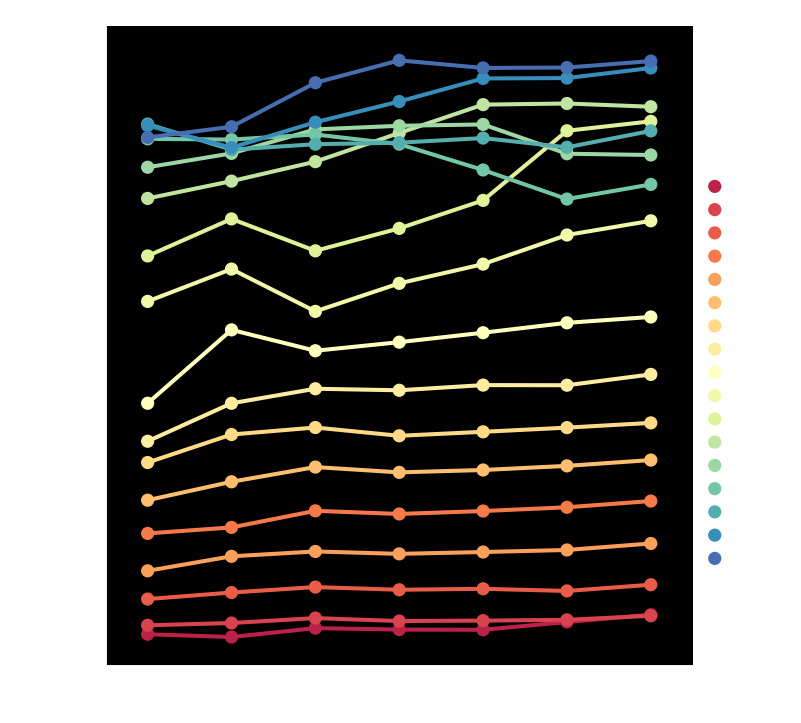

In [4]:
age_totals = asp[(asp['Sex']=='Total') & (asp['Variable'] != 'Total')]
age_totals_melt = age_totals.melt(id_vars = ['Variable'],value_vars = ['2011','2013','2014','2015','2016','2017','2018'])
years = ['2011','2013','2014','2015','2016','2017','2018']

g = sns.factorplot(x="variable", y="value", hue='Variable', data=age_totals_melt,palette = 'Spectral',size = 10)
plt.title('Population of Age groups over the years')
plt.ylabel('Population')
plt.xlabel('Year')
plt.show(g)

This definitely clears up any confusion present in the previous graph. We observe that there is indeed a growth in all age groups, except for children and teenagers. There is a slow but constant constant growth for people over the age of 40, with little variation among the ages. As shown in the previous graph, a high growth rate is observed for younger adults. 

We still do not know the differences in the normalized distribution of the population of the different years. We have only seen absolute figures. The graph below shows the proportion of the population that falls inside a specific age group for each year respectively. 

Text(0.5,0,'Age Groups')

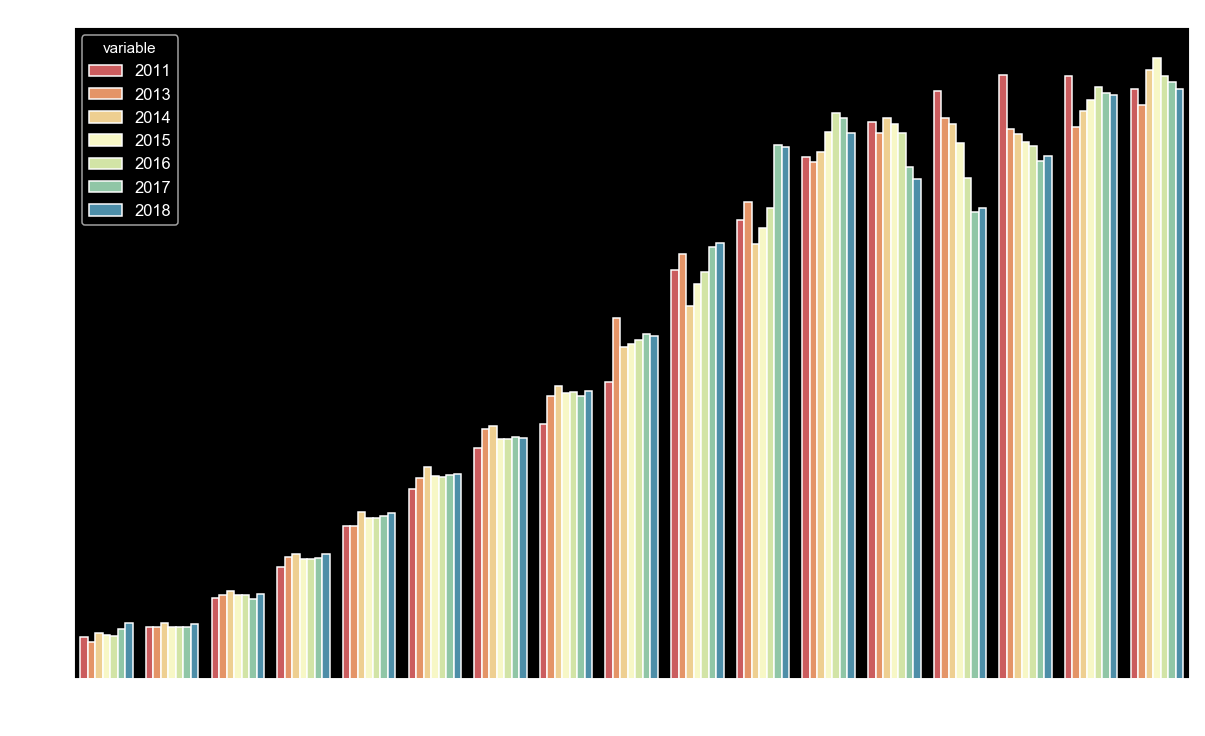

In [5]:
asp_m = asp[asp['Sex'] == 'Total']
asp_m = asp_m[['Variable','2011','2013','2014','2015','2016','2017','2018']][1:].reset_index(drop = True)
b= asp_m.iloc[3]
c = asp_m.iloc[4]
temp = asp_m.iloc[3].copy()
asp_m.iloc[3] = c
asp_m.iloc[4] = temp

asp_m_melt = asp_m.melt(id_vars = 'Variable',value_vars = ['2011','2013','2014','2015','2016','2017','2018'])
asp_m_n = asp_m.copy()
for y in years:
    asp_m_n[y] = asp_m_n[y]/asp_m_n[y].sum()
    
asp_m_n_melt = asp_m_n.melt(id_vars = 'Variable',value_vars = ['2011','2013','2014','2015','2016','2017','2018'])

plt.figure(figsize = (20,12))
plt.title('Normalized Distribution of Age')
sns.barplot(x = 'Variable',y = 'value',hue = 'variable',data = asp_m_n_melt,palette = 'Spectral')
plt.ylabel('% of Population')
plt.xlabel('Age Groups')

In both the previous two graphs, we saw that there is an increase in younger adults. This graph shows that the proportion of younger adults, wrt the total population, is less than in previous years. These younger adults will preresent a significant protion of the workforce for the next three decades. What does that mean for the future of South Africa's labour market?

Below is the CDF of the each year, as well as the difference between the CDF's of 2018 and 2011.

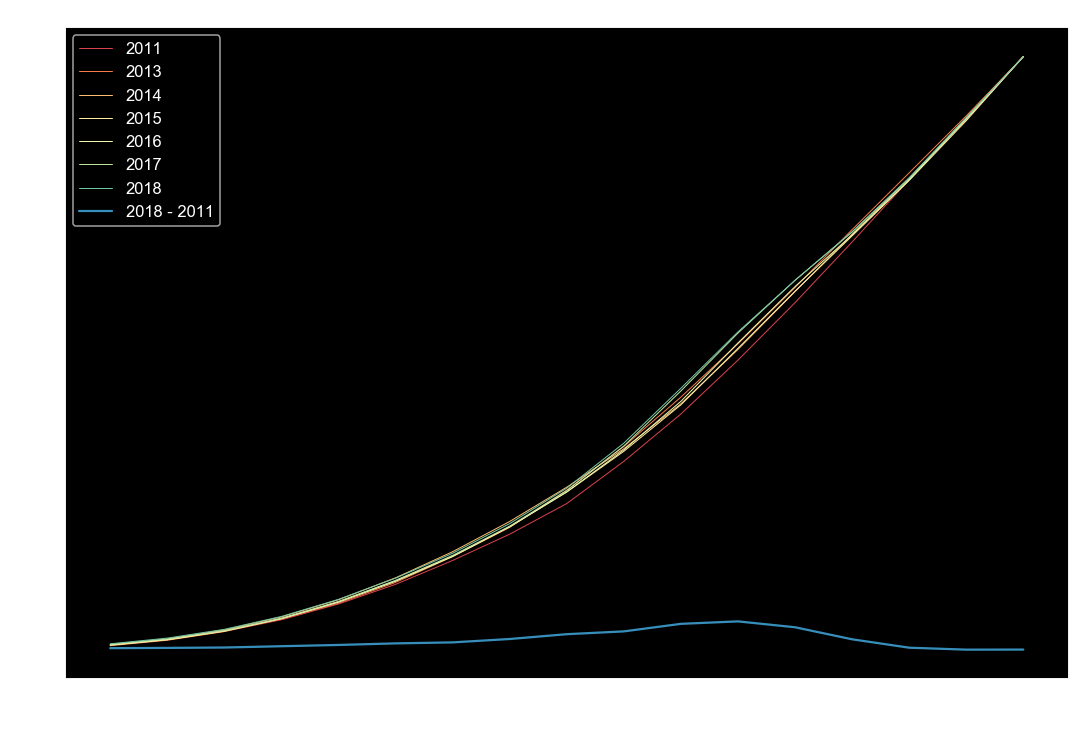

In [6]:
melt_g = asp_m_melt.groupby('variable')
asp_cdf = asp_m_melt[asp_m_melt['variable'] == '2011']['value'].cumsum()

years = ['2011','2013','2014','2015','2016','2017','2018']
cdfs = np.zeros(shape = (7,17))
cdfs_n = np.zeros(shape = (7,17))
j = 0
for i in years:
    cdfs[j] = asp_m_melt[asp_m_melt['variable'] == i]['value'].cumsum()
    cdfs_n[j] = cdfs[j]/cdfs[j].max()
    j = j+1
    

cdf_diff = cdfs[-1] - cdfs[0]
cdf_diff_n = cdfs_n[-1] - cdfs_n[0]



fig ,ax = plt.subplots(figsize = (18,12))
ticks = ['90','80','70','60','50','40','30','20','10','5']
plt.title('Normalized CDFs of population over age groups')
pal = sns.color_palette('Spectral',8)
for i,y in zip(range(0,7),years):
    plt.plot( cdfs_n[i] ,label = y,color = pal[i],linewidth = 1)
plt.plot(cdf_diff_n,label = '2018 - 2011',color = pal[-1])
plt.ylabel('Cum Sum %')
plt.xlabel('Age')
ax.set_xticklabels(ticks)
plt.legend()

There is very little difference between the CDF's of the different years. The increase at 30-20 y/o in the difference of 2018 and 2011 confirms what we have observed earlier. 

For the purpose of visualization, I have included a map of South Africa, indicating where most of the people reside. The smallest province contains the most amount of people.

In [7]:
als = pd.read_excel('Age_loc_sex_pop.xlsx')
als_t = als.groupby('Location').sum().reset_index()
als_t_melt = als_t.melt(id_vars = 'Location',value_vars = ['2011','2013','2014','2015','2016','2017','2018'])

to_plot18 = als_t_melt[als_t_melt['variable'] == '2018'].reset_index(drop = True)
to_plot18 = to_plot18[['Location','value']]
to_plot17 = als_t_melt[als_t_melt['variable'] == '2017'].reset_index(drop = True)
to_plot17 = to_plot17[['Location','value']]
to_plot15 = als_t_melt[als_t_melt['variable'] == '2015'].reset_index(drop = True)
to_plot15 = to_plot15[['Location','value']]
to_plot13 = als_t_melt[als_t_melt['variable'] == '2013'].reset_index(drop = True)
to_plot13 = to_plot13[['Location','value']]
to_plot11 = als_t_melt[als_t_melt['variable'] == '2011'].reset_index(drop = True)
to_plot11 = to_plot11[['Location','value']]
to_plot18['PROVINCE'] = to_plot18['Location']

map_list = {'Free State':'FS','Gauteng':'GT','Eastern Cape':'EC','KwaZulu-Natal':'KZN','Limpopo':'LIM','Mpumalanga':'MP','North West':'NW','Northern Cape':'NC','Western Cape':'WC'}
to_plot18['PROVINCE']=to_plot18['PROVINCE'].map(map_list)

In [8]:
import folium 

m = folium.Map(location=[-28, 22.9375],zoom_start = 5)
folium.Choropleth(
    geo_data='topo1.json',
    name='choropleth',
    data=to_plot18,
    columns=['PROVINCE','value'],
    key_on='feature.properties.CODE',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name = '2018 Population'
).add_to(m)

m

| Province           | Western Cape   | Gauteng | KwaZulu-Natal | Mpumalanga | Limpopo | Eastern Cape | North West | Free State | Northen Cape|
|--------------------|----------------|---------|---------------|------------|---------|--------------|------------|------------|-------------|
|   Density  |     45           | 675 | 85|52|43|39| 33| 21|3|

### Race

Now that we know how the population is distributed over age groups and where they live, we proceed deeper into the demographics and look at the multiple races of the rainbow nation. Firstly we take a look at the increase or descrease of races. When doing this, we have to keep in mind the growth of 14% that was just obeserved. 

The next graph is the proporation of the race with respect to the population of that year.

Variable variable      value
0  Black African   2010_n  79.276995
1       Coloured   2010_n   9.015069
2   Indian/Asian   2010_n   2.543603
3          White   2010_n   9.164332
4  Black African   2015_n  80.411242
5       Coloured   2015_n   8.706926
6   Indian/Asian   2015_n   2.510911
7          White   2015_n   8.370921

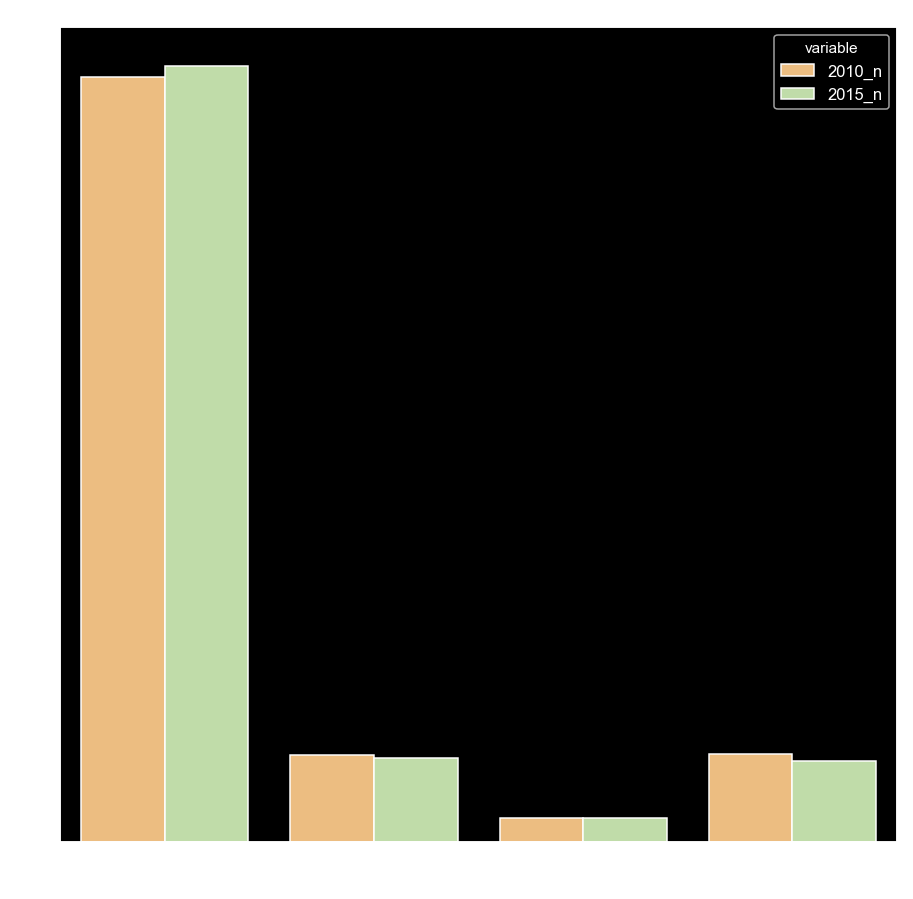

In [9]:
lrp = pd.read_excel('Location_race_pop.xlsx')
lrp = lrp[lrp['Sex'] == 'Total']
lrp = lrp.drop(['Units','Sex'],axis = 1).reset_index(drop = True)



lrp['PROVINCE'] = lrp['Location']

map_list = {'Free State':'FS','Gauteng':'GT','Eastern Cape':'EC','KwaZulu-Natal':'KZN','Limpopo':'LIM','Mpumalanga':'MP','North West':'NW','Northern Cape':'NC','Western Cape':'WC'}
lrp['PROVINCE']=lrp['PROVINCE'].map(map_list)

lrp15 = lrp.drop(['2010'],axis = 1).reset_index()
lrp10 = lrp.drop(['2015'],axis = 1).reset_index()

lrp['2015_n'] = 100*lrp['2015']/lrp['2015'].sum()
lrp['2010_n'] = 100*lrp['2010']/lrp['2010'].sum()
lrp_tot = lrp.groupby('Variable').sum().reset_index()
lrp_tot = lrp_tot.melt(id_vars = 'Variable',value_vars = ['2010_n','2015_n'])
lrp_tot.head()
#sum_10 = lrp_tot[lrp_tot['variable'] == '2010']['value'].sum()
#sum_15 = lrp_tot[lrp_tot['variable'] == '2015']['value'].sum()


plt.figure(figsize = (15,15))
sns.barplot(x = 'Variable',y ='value',hue = 'variable',data = lrp_tot ,palette = 'Spectral')
plt.title('Race percentage ')
plt.xlabel('Race')
plt.ylabel('Percentage')

lrp_tot.head(20)

Black Africans are the only race that has increased. The White and Coulored portion has decreased while Indians/Asians has decreased very slightly. Since Black Africans accounts for almost 80% of the population and birth rates are of an exponential kind, it comes as no suprise that the Black African portion has increased and the others decreased.

The graph below visualisez the make up of each province in terms of race.

Text(0,0.5,'Percentage')

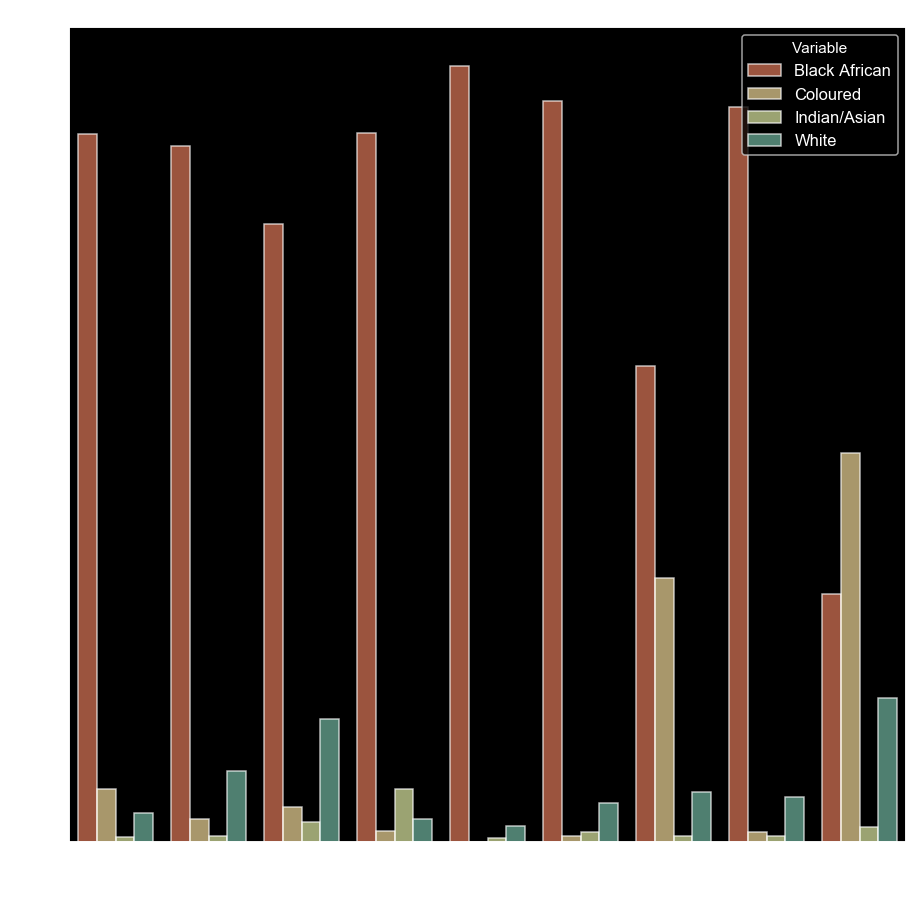

In [48]:
x = lrp15.groupby(['PROVINCE','Variable']).agg({'2015':'sum'})
x.head()
xx = x.groupby(level = 0).apply(lambda y : 100*y/float(y.sum())).reset_index()

y = lrp10.groupby(['PROVINCE','Variable']).agg({'2010':'sum'})
y.head()
yy = y.groupby(level = 0).apply(lambda y : 100*y/float(y.sum())).reset_index()


plt.figure(figsize = (15,15))
sns.barplot(x = 'PROVINCE' , y = '2015',hue = 'Variable',data = xx,palette = 'Spectral',alpha = 0.7)
plt.title('Race % in Provinces (2015)')
plt.xlabel('Provinces')
plt.ylabel('Percentage')



The outlier is clearly the Western Cape with more Coloureds than Black Africans. The other two provinces that catches the eye is Gauteng and Northern Cape. Gauteng has a larger White population compared to other provinces and the Northern Cape has a very large Coloured population.

We have a good picture of what the population of South Africa looks like. We know how old people are, we know where the reside and the races of the people and provinces. Below are a few bullet points that serves as a summary of the key findings above.
-  Population :  57 725 606  with a 14% growth rate over 7 years.
-  Black Africans : 80.4 % , Whites : 8.3% , Coloured : 8.7 % , Indian/Asian : 2.5 %
-  Small younger adult population 
-  Gauteng is the most populated Province
-  Western Cape is the only province where Black Africans are not the majority.
-  Limpopo possess ther most uniform population with 97% Black Africans


 ***

## Ownership of Items , Expenditure and Income 

Now that the context is set, we shift our focus to the socio-economic status of the population. The ownership of necessities and luxuries are analysed. This can show us the primary needs and priorities of people. The expenditure of a household reveals what people consider important. The combination of expenditure and ownership of items will give us a much better comprehension of the socio-economic status of the country and will unveil the core characteristics of the average household in South Afrcia.

### Ownership of Items

We will look at the percentage of households that own certain items in different provinces. The items include basic daily objects and luxuries.

The first graph is a violin plot of the percentage of households in each province that owns a certain item. The violin plot provides use with the mean and standard deviation that allows us to gather more information.

In [11]:
op = pd.read_excel('owenership_province.xlsx')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

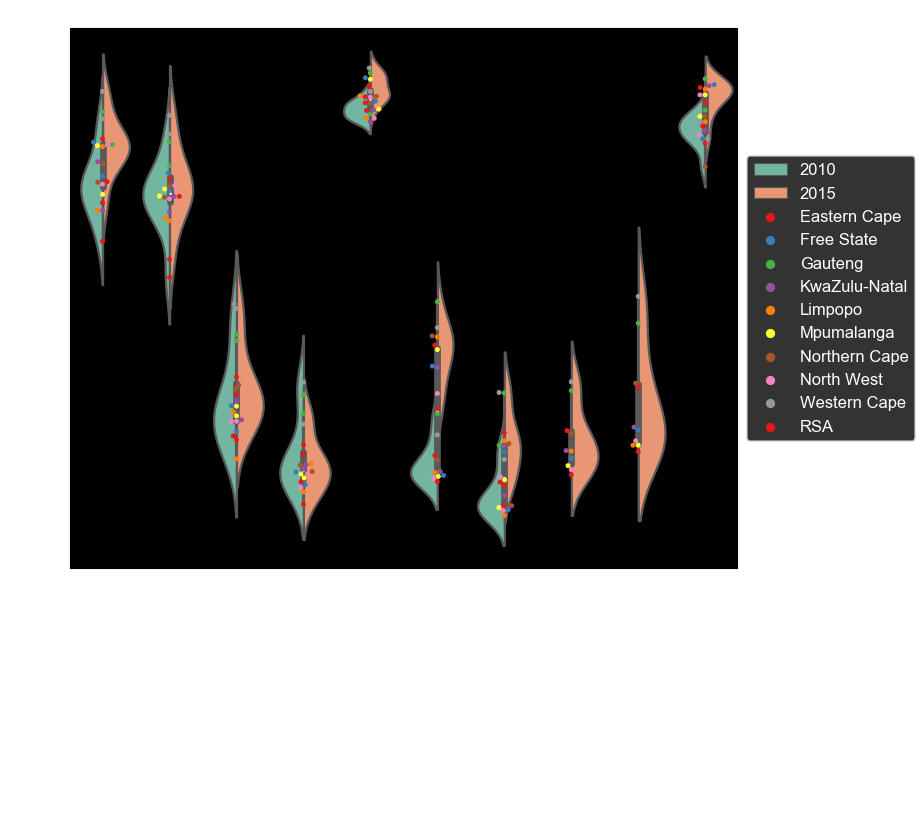

In [47]:
op_melt = op.melt(id_vars = ['Location Name','Variable Name'],value_vars = ['2010','2015'])

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.violinplot(x = 'Variable Name',y = 'value',data = op_melt,hue = 'variable',palette ='Set2',split = True).set_title('Dist. of Ownership of Items (2010 ,2015)')
sns.swarmplot(x = 'Variable Name',y = 'value',data = op_melt,palette = 'Set1',hue = 'Location Name')

plt.ylabel('% Ownership')
plt.xlabel('Item')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

Naturally, a **bed** is one of the most possessed items (~95% median) with a small standard deviation. The next most possessed item is a **Cellphone** with a slightly larger standard deviation. Luxury items like DStv, Motor Vehicle, Computer and Internet (arguably luxurious) is widely distributed. Upto 60% (40%) of some provinces possess DStv (Internet) while only 15% (5%) of other provinces do. Although we only have data of geysers in 2015, we observe the largest variation there amongst the provinces. This shows the broad inequality and differences of our provinces. Even though luxuries are ill possessed, there is a clear increase in the possession of all goods over the years.

We saw which items are more and which are less owned. We also observed a large variation in the possesion of items in different provinces. Lets find out which provinces own what. The follwing plot shows the ownership of items of each province.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

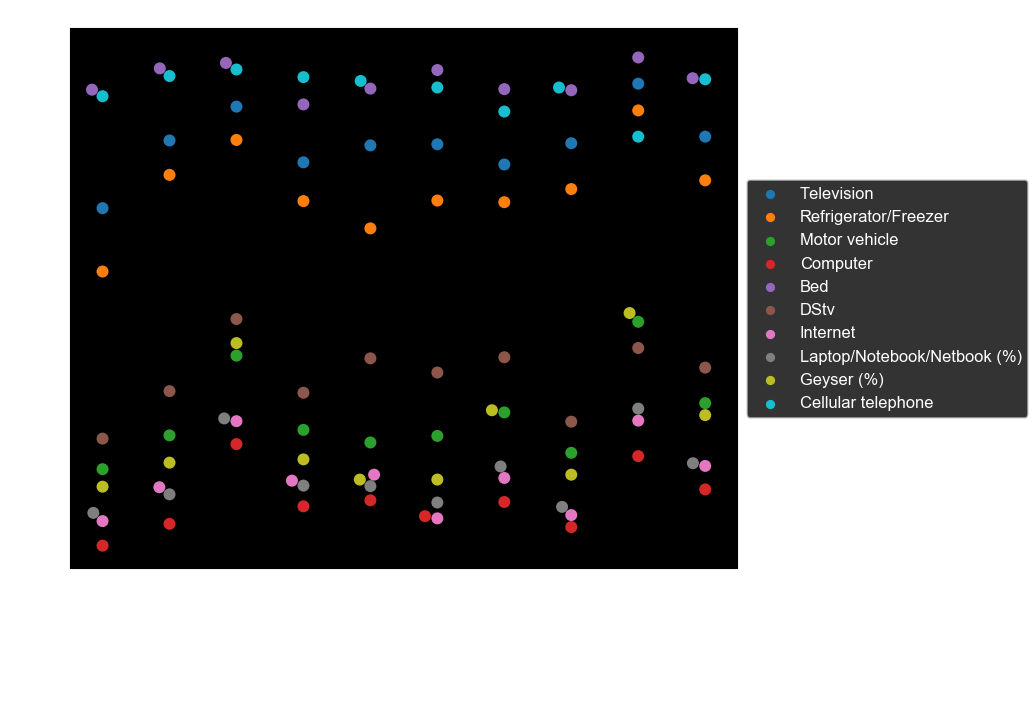

In [13]:
plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.swarmplot(hue = 'Variable Name',y = '2015',x = 'Location Name',data = op,palette ='tab10',size = 12).set_title('Ownership of Items by Location')
plt.xlabel('Province')
plt.ylabel('Percentage')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

The order of the items are relatively constant over the provinces. This implies that all the provinces have similar priorities and needs. <br>The Western Cape is the only province that prioritizes Vehicles and Geysers over DStv. **Gauteng** and **Western Cape** have a higher average possession rate than the other countries, especially regarding the lesser possessed items. These are the two provinces that is known to be better off economically. We will confirm this later on when we explore the income.

The most possessed items are :
1. Bed
2. Cellphone
3. Television

The least possessed items are :
1. Computer
2. Internet
3. Laptop
<br>

### Expenditure 
The expenditure shows us what people spend their money on. It can answer many questions, including 'Do people have money left for luxuries?' , 'What do people spend most of their money on?' and other more rudimental questions.

Lets start off with the annual expenditure of the average household in each province in 2010 and 2015.


In [14]:
pep = pd.read_excel('percentage_expenditure_province.xlsx')

inc = pd.read_excel('Income.xlsx')
inc['PROVINCE'] = inc['Location']

map_list = {'Total':'RSA','Free State':'FS','Gauteng':'GT','Eastern Cape':'EC','KwaZulu-Natal':'KZN','Limpopo':'LIM','Mpumalanga':'MP','North West':'NW','Northern Cape':'NC','Western Cape':'WC'}
inc['PROVINCE']=inc['PROVINCE'].map(map_list)
inc.head()
inc['Total Income'] = inc['Total Income']/1000
inc['Mean Income'] = inc['Mean Income']/1000


value
count       9.000000
mean    76717.111111
std     29038.771971
min     52459.000000
25%     59662.000000
50%     65742.000000
75%     72922.000000
max    134735.000000

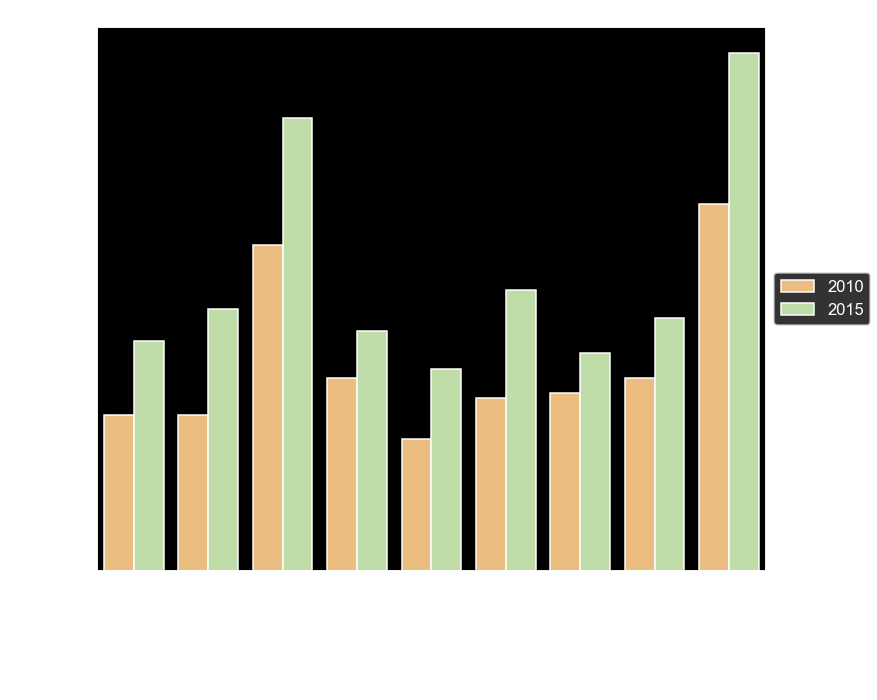

In [15]:
inc_sum = inc.groupby('Location').sum().reset_index()[['Location','Mean Income']]
pep_sum = pep.groupby('Location Name').sum().reset_index()[['Location Name','2010']]
inc_sum = inc_sum[inc_sum['Location'] != 'Total'].reset_index()

inc_sum['Expenditure'] =  pep_sum['2010']
inc_sum = inc_sum.reset_index()
inc_sum = inc_sum.melt(id_vars ='Location', value_vars = ['Mean Income','Expenditure']).dropna()

pep_sum = pep.groupby('Location Name').sum().reset_index()
pep_sum = pep_sum.melt(id_vars = 'Location Name')


plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(hue = 'variable',y = 'value',data = pep_sum,x = 'Location Name',palette ='Spectral').set_title('Expenditure of Average Household ')

plt.ylabel('Expenditure')
#plt.xlabel('Location')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 45)

pep_sum[pep_sum['variable'] == '2015'].describe()

In the ownership of items section above, we saw that **Gauteng** and **Western Cape** possessed more items. Their expenditure is also significantly higher. The average expenditure (2015) is R76 717  with a very large standard deviation of R29 038. Once again the substantial gap between provinces is revealed.

Lets focus on the items and how much is pent on them. A violin plot is presented to visualize the distribution of the portion of expenditure of the average household on each item.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

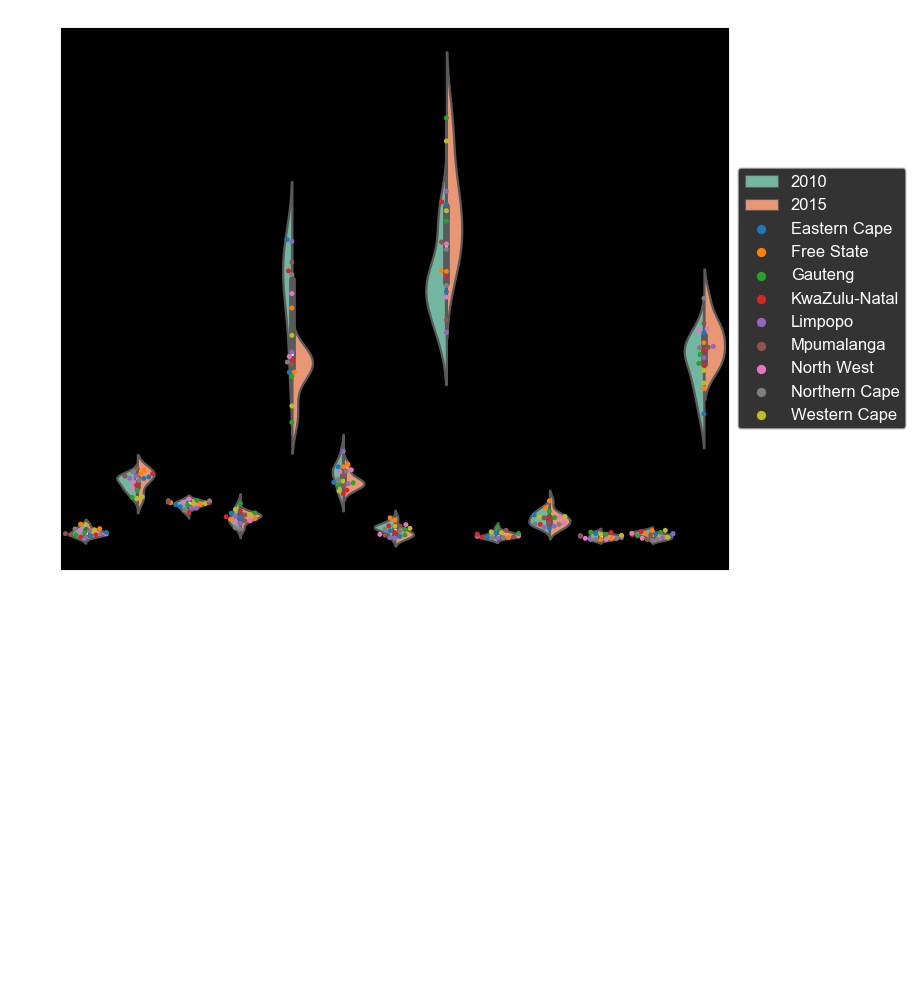

In [16]:
x = pep.groupby(['Location Name','Variable Name']).agg({'2015':'sum'})
xx = x.groupby(level = 0).apply(lambda y : 100*y/float(y.sum())).reset_index()

y = pep.groupby(['Location Name','Variable Name']).agg({'2010':'sum'})
yy = y.groupby(level = 0).apply(lambda y : 100*y/float(y.sum())).reset_index()

pep_melt = pd.concat([xx,yy])
pep_melt = pep_melt.melt(id_vars = ['Location Name','Variable Name'] ).dropna()

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
plt.title('Violin plot of % of expenditure')
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.violinplot(x = 'Variable Name',y = 'value',data = pep_melt,hue = 'variable',palette ='Set2',split = True)
sns.swarmplot(x = 'Variable Name',y = 'value',data =pep_melt,palette = 'tab10',hue = 'Location Name')

plt.ylabel('Percentage')
plt.xlabel('Items')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

It seems that **Food, Housing and Transport** are the items that is accountable for the most expenditure. There is also a very large standard deviation present in those three items. People spend the least amount on **Alcoholic drinks**.
So how does the expenditure change amongst the provinces?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

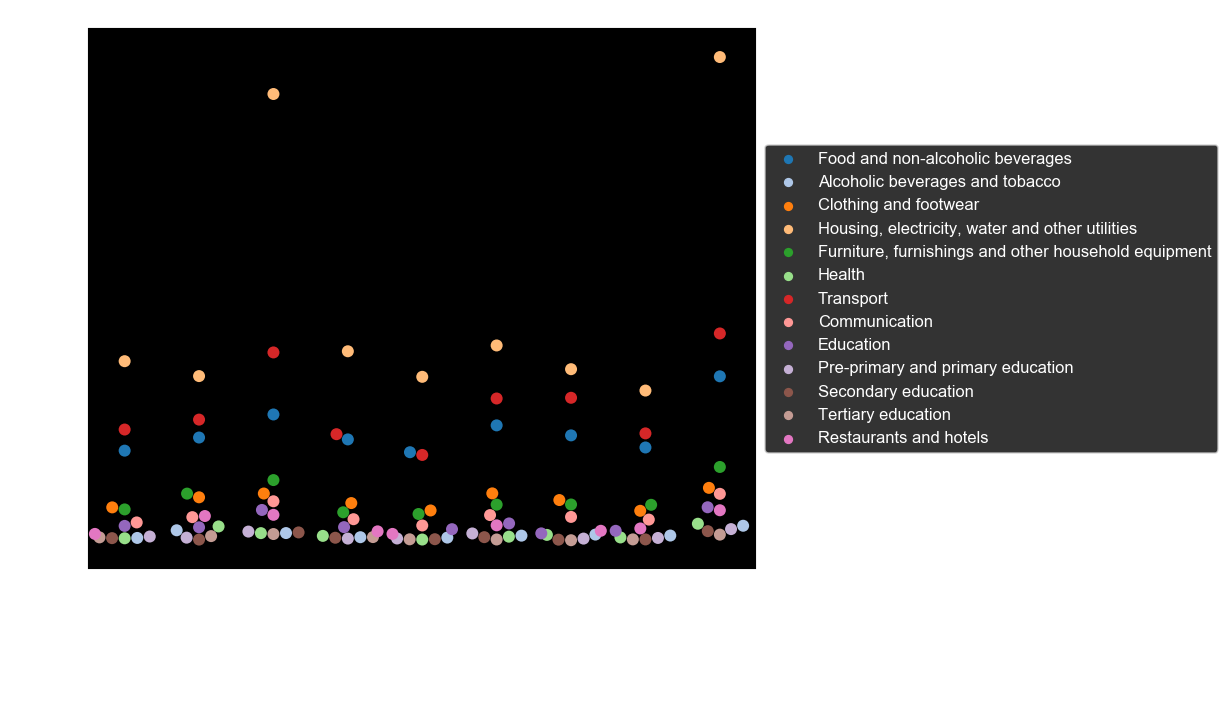

In [17]:
pep_swarm =pep[(pep['Variable Name'] == 'Education' )|(pep['Variable Name'] == 'Communication' )|(pep['Variable Name'] == 'Transport' )|(pep['Variable Name'] == 'Health' )|(pep['Variable Name'] == 'Food and non-alcoholic beverages' )|(pep['Variable Name'] == 'Alcoholic beverages and tobacco' )|(pep['Variable Name'] == 'Housing, electricity, water and other utilities' )]
plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.swarmplot(hue = 'Variable Name',y = '2015',x = 'Location Name',data = pep,palette ='tab20',size = 12).set_title('Expenditure on Items')
plt.xlabel('Province')
plt.ylabel('Expenditure')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

Once again the order of the items are ordered similarly across the provinces. This implies that items cost more or less the same and people have similar priorities. **Gauteng** and **Western Cape's** **housing** and **transport** expenditure is almost double other provinces'. This could be the cause of their high general expenditure, but it does not affect their high rate of onwership of goods. To see why they own so many goods, we have to look at the income.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

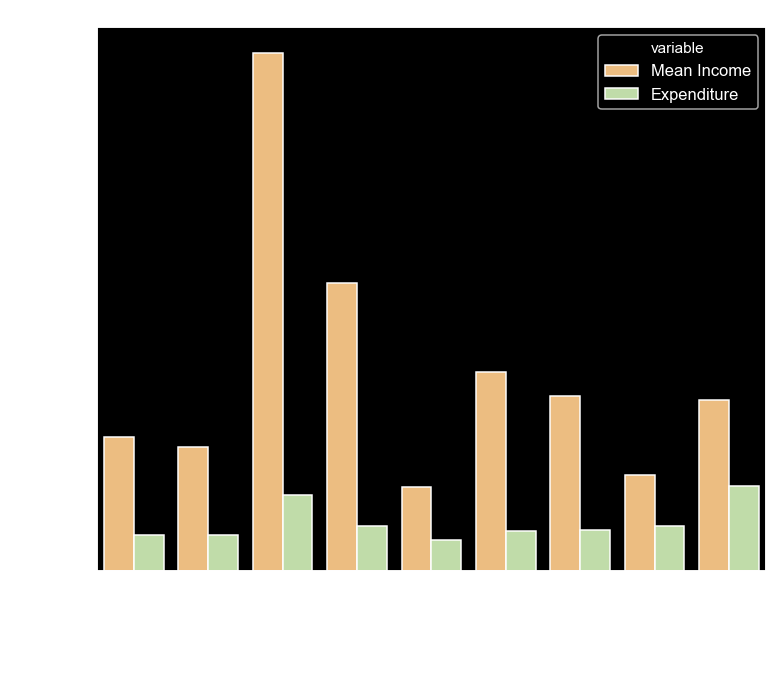

In [18]:

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(hue = 'variable' ,y = 'value',data = inc_sum,x = 'Location',palette ='Spectral').set_title('Income vs Expenditure (2010)')

plt.ylabel('Rank')
plt.xlabel('Province')
plt.xticks(rotation = 45)

Gauteng generates an outstanding amount of income, with KwaZulu Natal second and Western Cape in third. Although Western Cape has the highest expenditure, they have a small Income/Expenditure ratio. This might be due to high living costs in general, but it is not in the scope of this exploration. Gauteng on the other hand has a massive Income/Expenditure ratio.
Gauteng's large relative income explains its high rate of ownership and expenditure.



---

# Income

We take a deeper look into the income of our nation with the purpose of identifying where the wealth lies and which subset of people generate the most. We look at 7 of the most influential factors of an individual's income. Each of the following factors are explored in a fundamental fashion followed by a distribution of income over the factor's categories.<br> The factors are : 
1. Race
2. Education Level
3. Age
4. Location

I wish to generate a hypothesis based on the findings regarding these factors and individual income. To be more specific, I wish to reveal which categories of each factor generates the largest income. The general consensus is that white older, more qualified people in Gauteng receives the largest income.

The income considered here is solely based on salary and not on other income sources.


First, to get perspective, the income distribution , total wealth distribution and cumulative income distribution is explored.

Descriptive Statistics
count       16.000000
mean     26968.750000
std      29691.311159
min          0.000000
25%       3750.000000
50%      11500.000000
75%      48125.000000
max      85000.000000
Name: Sal, dtype: float64
Skewness
0.9147382118523615
Kurtosis
-0.6795855242036746


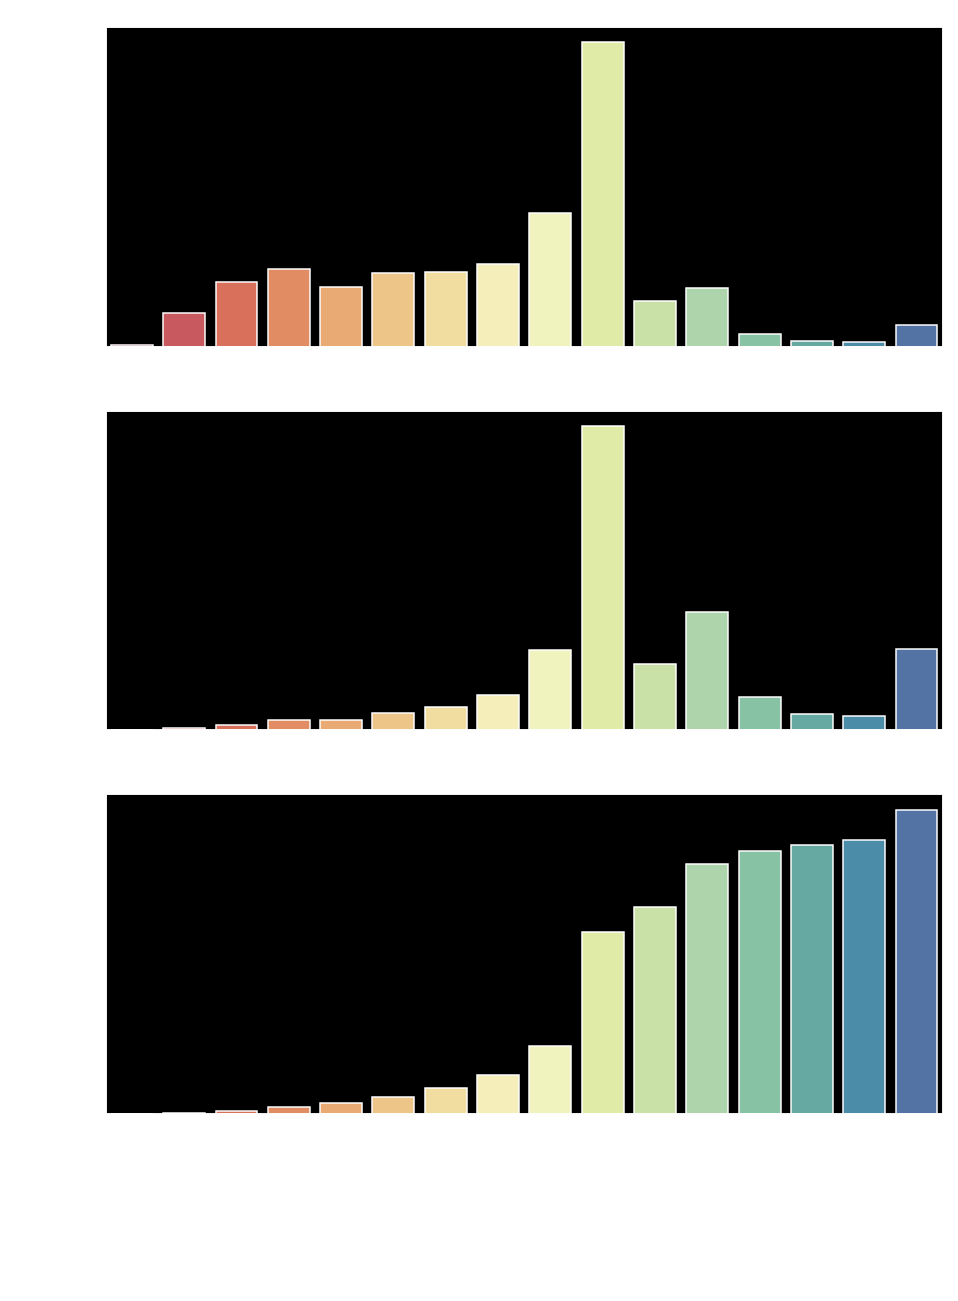

In [19]:
ad = pd.read_excel('lab_dyn_age_degree.xlsx')
ad = ad.fillna(method = 'ffill')
ad['Age Group'] = ad['Age Group'].apply(lambda x : x[4:])

ad_inc = ad.groupby('Salary category').sum().reset_index()[['Salary category','Total']]
sal_map = {'NONE':0,'R1 001 - R1 500':1250,'R1 501 - R2 500':2000,'R2 501 - R3 500':3000,'R3 501 - R4 500':4000,'R4 501 - R6 000':5250,'R6 001 - R8 000':7000, 'R8 001 - R11 000':9500, 'R11 001 - R16 000':13500, 'R16 001 - R30 000':22500,'R30 001 - R37 500':32500, 'R37 501 - R54 167':45000,'R54 168 - R62 500':57500,'R62 501- R70 800':66000,'R70 801 - R83 300':77500,'R83 301 OR MORE':85000}
ad_inc['Sal'] = ad_inc['Salary category'].map(sal_map)
sal_odr = ['NONE','R1 001 - R1 500','R1 501 - R2 500','R2 501 - R3 500','R3 501 - R4 500','R4 501 - R6 000','R6 001 - R8 000','R8 001 - R11 000','R11 001 - R16 000','R16 001 - R30 000','R30 001 - R37 500','R37 501 - R54 167','R54 168 - R62 500','R62 501- R70 800','R70 801 - R83 300','R83 301 OR MORE']

ad_inc['Gross'] = ad_inc['Sal']*ad_inc['Total']
ad_inc = ad_inc.sort_values(by = 'Sal')
ad_inc['CumGross']= ad_inc['Gross'].cumsum()

fig , ax = plt.subplots(3,1,figsize = (15,20),sharex = True)

sns.barplot(y = 'Total',data = ad_inc,x = 'Salary category',palette ='Spectral',order = sal_odr,ax = ax[0]).set_title('Income Distribution')
sns.barplot(y = 'Gross',data = ad_inc,x = 'Salary category',palette ='Spectral',order = sal_odr,ax = ax[1]).set_title('Total Wealth owned by Income Group (Salary * number of people)')
sns.barplot(y = 'CumGross',data = ad_inc,x = 'Salary category',palette ='Spectral',order = sal_odr,ax = ax[2]).set_title('Cumulative Wealth owned by Income Group')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Income Groups')
ax[0].set_ylabel('# of Respondents')
ax[1].set_ylabel('Total Wealth owned by Group ')
ax[2].set_ylabel('Cumulative Wealth ')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

print('Descriptive Statistics')
print(ad_inc.describe()['Sal'])
print('Skewness')
print(ad_inc.skew()['Sal'])
print('Kurtosis')
print(ad_inc.kurt()['Sal'])

First looking at the descriptive statistics, we see that the mean is R26 968.75 where the meadian is R11 500. The mode is clearly the R16k-R30k group. Little people fall in the groups to the right whereas many fall in the groups on the left. The majority of South Africa earns less than R11500 with only 25% earning above R48 125. This implies a positive skew distribution with a much longer right tail, as the positive skewness measure indicates. This means that most of the respondents fall in the lower part of the income groups. The kurtosis is -0.68 which implies not many outliers and lighter and shorter tails.<br>

The first plot verifies the descriptive statistics. The second plot shows the total wealth held by each income group. Compared to the first graph, we see that the groups to the left of the mode has significantly decreased while the groups on the right has increased. The two graphs are almost the left/right inverse of eachother. We can see that the right side of the mode has more weight and that the majority of wealth is owned by the top 5 income groups.
The third plot clarifies the jump at the R16k-R30k income group.

    

## Race and Location
Race and location are two factors that are easy to combine and can be analysed simultaneously. Also, we have explored the provinces above.

The map and barplot below shows the mean income of each province and the mean income of each race in each province respectively.


In [20]:
inc_m = inc[inc['Variable'] == 'mean']

m_m = folium.Map(location=[-28, 22.9375],zoom_start = 5)
folium.Choropleth(
    geo_data='topo1.json',
    name='choropleth',
    data=inc_m,
    columns=['PROVINCE','Mean Income'],
    key_on='feature.properties.CODE',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name = '2010 Mean Income'
).add_to(m_m)

m_m

count           mean           std           min           25%  \
Variable                                                                        
Black African   10.0   12462.180618   7881.259463   4883.302499   8388.839354   
Coloured        10.0   27644.698579  26523.593087   6417.389055  15654.409882   
Indian/Asian    10.0   57404.037659  39454.102888  15248.683753  28654.440450   
White           10.0  107883.316467  64772.225353  26983.134069  73912.476183   
mean            10.0   20745.194900  16252.471514   7235.876979  12402.951275   

                        50%            75%            max  
Variable                                                   
Black African   9433.172527   13811.896756   32762.239639  
Coloured       19885.727413   24637.668002   95451.833257  
Indian/Asian   54425.675242   67296.833576  145979.251625  
White          81729.016949  130398.077541  245815.965755  
mean           14628.963943   22534.555487   63019.087922

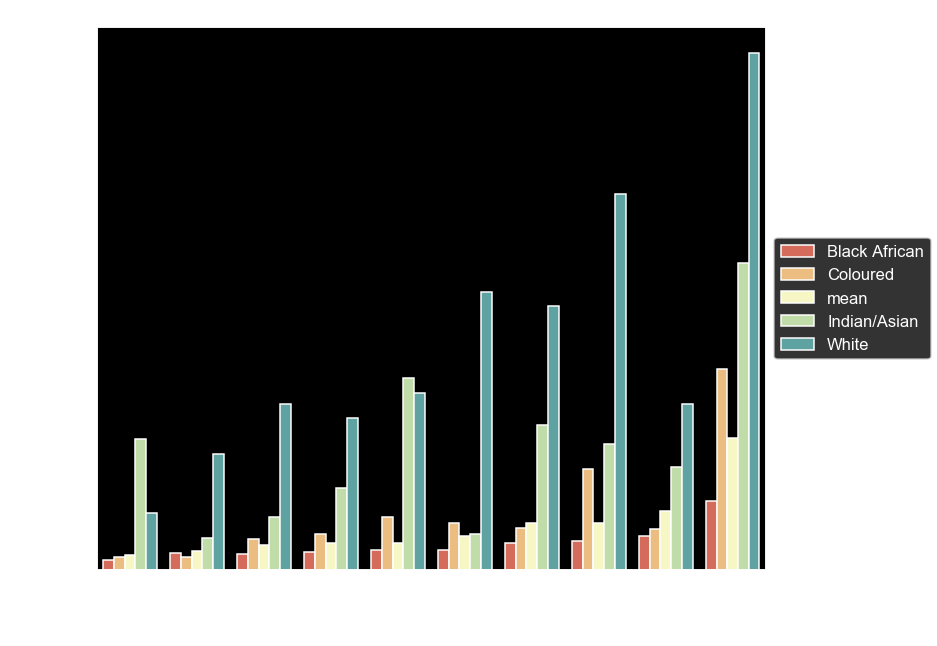

In [21]:
inc = inc.sort_values(by = 'Mean Income')
plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(x = 'PROVINCE',y = 'Mean Income',data = inc,hue = 'Variable',palette ='Spectral').set_title('Mean Annual Income by Province and Race (2010)')

plt.ylabel('Income')
plt.xlabel('Province')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
inc.groupby('Variable').describe()['Mean Income']

count           mean           std           min           25%  \
Location                                                                        
Eastern Cape     5.0   30076.653925  26288.393505   8635.295018  13105.768153   
Free State       5.0   27879.057012  29365.472071   7770.567311  12206.994610   
Gauteng          5.0  116605.675640  83526.695177  32762.239639  63019.087922   
KwaZulu-Natal    5.0   64704.603433  66437.128636  14046.638319  22551.449571   
Limpopo          5.0   18888.078054  20536.932476   6417.389055   8306.687466   
Mpumalanga       5.0   44683.339904  39876.164591   9427.290296  12990.821269   
North West       5.0   39415.055379  51999.239304   9439.054758  16152.159733   
Northern Cape    5.0   21617.084252  24577.977198   4883.302499   6481.101767   
Total            5.0   49986.377558  47572.523602  13107.672066  20069.316152   
Western Cape     5.0   38422.931288  25955.392161  16243.058807  19702.138675   

                        50%            75%            max  
Location                                                   
Eastern Cape   17418.748260   38994.373824   72229.084371  
Free State     15066.297089   25207.795992   79143.630058  
Gauteng        95451.833257  145979.251625  245815.965755  
KwaZulu-Natal  48105.851624   60030.788580  178788.289070  
Limpopo         9319.672084   15248.683753   55147.957914  
Mpumalanga     25408.181046   84314.403839   91276.003072  
North West     17085.802443   22326.128868  132072.131093  
Northern Cape   7235.876979   26983.134069   62502.005945  
Total          22483.873238   68895.109452  125375.916884  
Western Cape   28386.245438   48820.561904   78962.651616

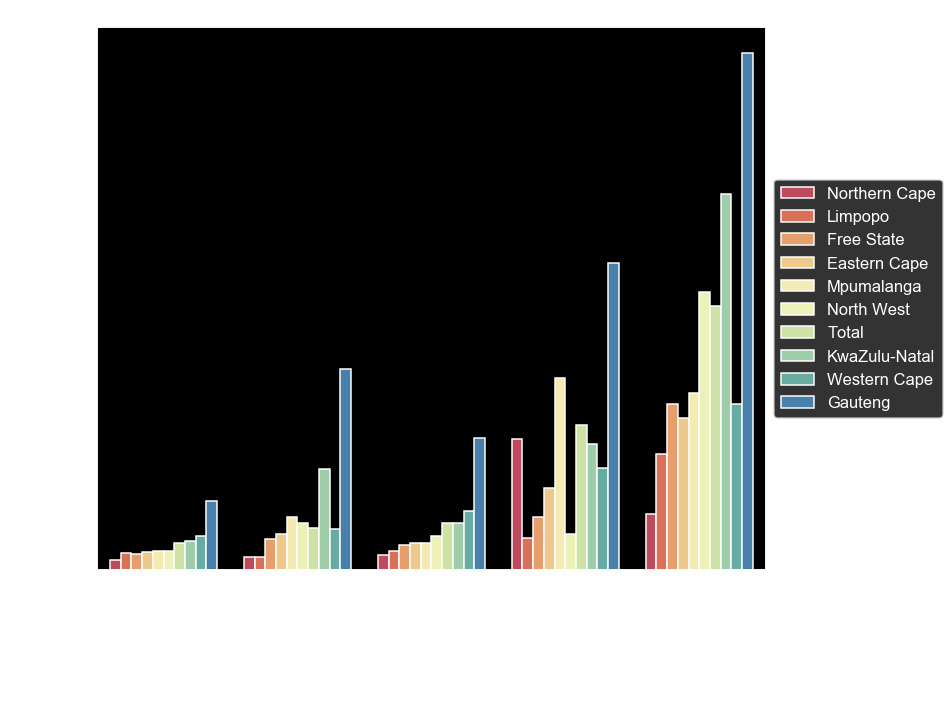

In [22]:
inc = inc.sort_values(by = 'Mean Income')
plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(x = 'Variable',y = 'Mean Income',data = inc,hue = 'Location',palette ='Spectral').set_title('Mean Annual Income by Race and Province (2010)')

plt.ylabel('Income')
plt.xlabel('Race')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
inc.groupby('Location').describe()['Mean Income']

A quick look at the map tells us that **Gauteng, KwaZulu Natal** and **Western Cape** are well above average.

According to barplot_1:
- Whites earn 5.2 times the mean 
- Indians/Asians earn 2.8 times the mean
- Coloureds earn 1.3 times the mean
- Black Africans earn 0.6 times the mean

According to barplot_2:
- All the races earn the most in Gauteng
- All races, except for Indian/Asians, earn the least in Northern Cape
- Gauteng has the largest standard deviation, but the first quartile earn more than the second quartile in other provinces

It is undisputable that Whites is the highest earning race and Gauteng the highest earning province. It is needless to say that White Gautengers out-earn all other combinations.

## Education Level

The level of education ranges from No Schooling to a higher degree (masters or doctorates). The education levels represent the highest level completed by the individual. Education is considered a strong driver of a person's income, we will see if that statement holds up by looking at the income of various education levels. The data used for this is of the labour force and only include people older than 15. 


In [23]:
edu_pep_m = pep[(pep['Variable Name'].str.contains('education')) | (pep['Variable Name'].str.contains('Education')) ]

edu_pep_m['PROVINCE']=edu_pep_m['Location Name'].map(map_list)


map_list = {'Free State':'FS','Gauteng':'GT','Eastern Cape':'EC','KwaZulu-Natal':'KZN','Limpopo':'LIM','Mpumalanga':'MP','North West':'NW','Northern Cape':'NC','Western Cape':'WC'}
edu_pep_m['PROVINCE']=edu_pep_m['Location Name'].map(map_list)
edu_pep_map = edu_pep_m[(edu_pep_m['Variable Name'].str.contains('Education')) ]

edu = pd.read_excel('Education_deep.xlsx') # 2014/2015
income_groups = {'More than R 71 478' :70000,'R 13 818 - R 28 091' :20000,'R 28 091 - R 71 478':50000,'R 6 485 - R 13 818' :10000,'R0 - R 6 485':3000}
edu['Income'] = edu['Income group']
edu['Income'] =edu['Income'].map(income_groups)

edu_level_count = edu.groupby('Education Level').sum().reset_index()
edu_level_count_melt = edu_level_count.melt(id_vars = 'Education Level')
edu_level_count_melt = edu_level_count_melt[(edu_level_count_melt['variable'] != 'Total') & (edu_level_count_melt['Education Level'] != 'Total') & (edu_level_count_melt['variable'] != 'Income')]
y1 = edu_level_count_melt.groupby(['variable','Education Level']).agg({'value':'sum'})
yy1 = y1.groupby(level = 0).apply(lambda y : 100*y/float(y.sum())).reset_index()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

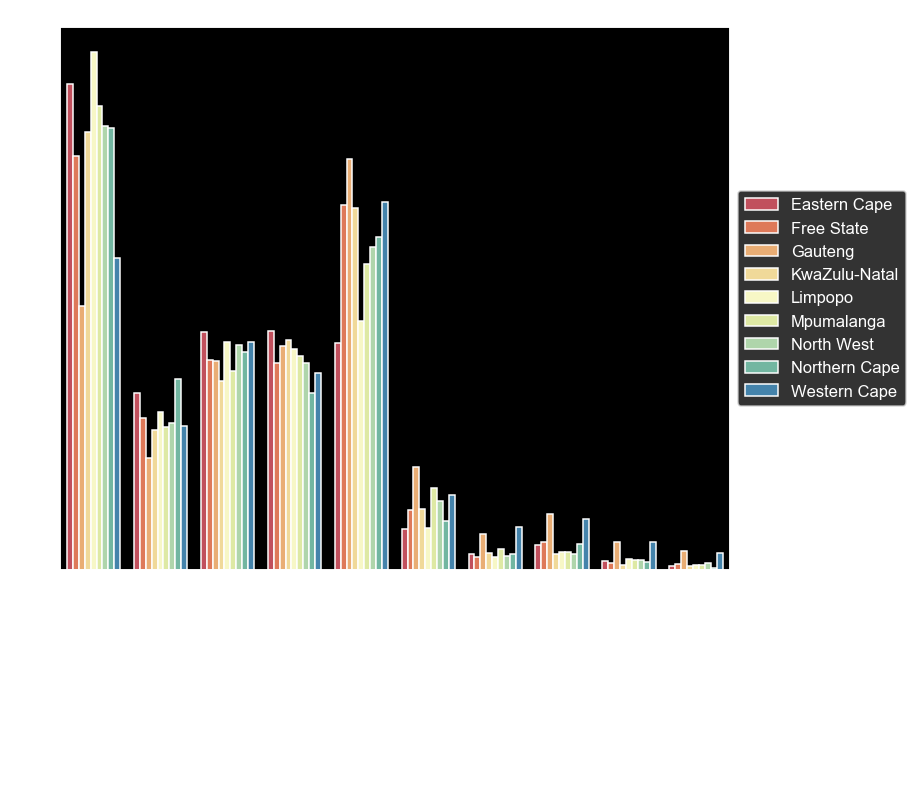

In [24]:

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
order = ['No schooling','Grade 7','Grade 10','Grade 11','Grade 12 (no exemption)','Grade 12 (exemption)','Higher Diploma','Bachelors Degree','Honours Degree','Higher Degree']
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(x = 'Education Level',y = 'value',data = yy1,hue = 'variable',palette ='Spectral',order = order).set_title('% of Students in Province Highest Education Level')

plt.ylabel('% Students')
#plt.xlabel('Highest Education Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

It is very surprising to see that **No Schooling** is accounted for by a large portion of each province. Lets proceed with our aim by including the income of each group in our analysis. The barplot visualizes the portion of each education level that falls in each income group.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

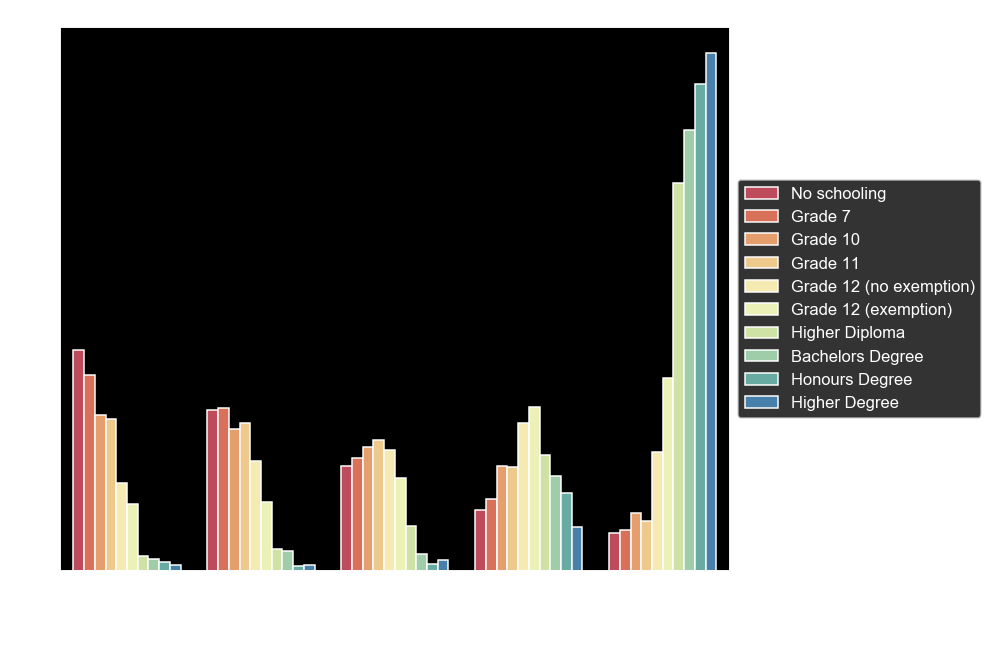

In [25]:
edu_norace = edu.groupby(['Education Level','Income']).sum().reset_index()
# income_groups = {'More than R 71 478' :70000,'R 13 818 - R 28 091' :20000,'R 28 091 - R 71 478':50000,'R 6 485 - R 13 818' :10000,'R0 - R 6 485':3000}
# edu_norace['Income'] = edu_norace['Income group']
# edu_norace['Income'] =edu_norace['Income'].map(income_groups)
edu_norace = edu_norace[edu_norace['Education Level'] != 'Total']

edu_edu = edu.groupby(['Education Level','Income']).sum().reset_index()
edu_edu = edu_edu[['Education Level','Income','Total']]

y1 = edu_edu.groupby(['Education Level','Income']).agg({'Total':'sum'})
yy1 = y1.groupby(level = 0).apply(lambda y : 100*y/float(y.sum())).reset_index()

yy1.head(30)
order = ['No schooling','Grade 7','Grade 10','Grade 11','Grade 12 (no exemption)','Grade 12 (exemption)','Higher Diploma','Bachelors Degree','Honours Degree','Higher Degree']

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(hue = 'Education Level',y = 'Total',data = yy1,x = 'Income',palette ='Spectral',hue_order=order).set_title('% of Education Groups in Income Group')

plt.ylabel('% oif Education Group')
plt.xlabel('Income Group')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)



The correlation of more education with a higher salary is undeniable. The lower income groups consist of individuals with no or little schooling where as the high income groups consist of higher degrees. If we look at the data from a different angle by calculatin the mean of each education level we arrive at the same conclusion.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

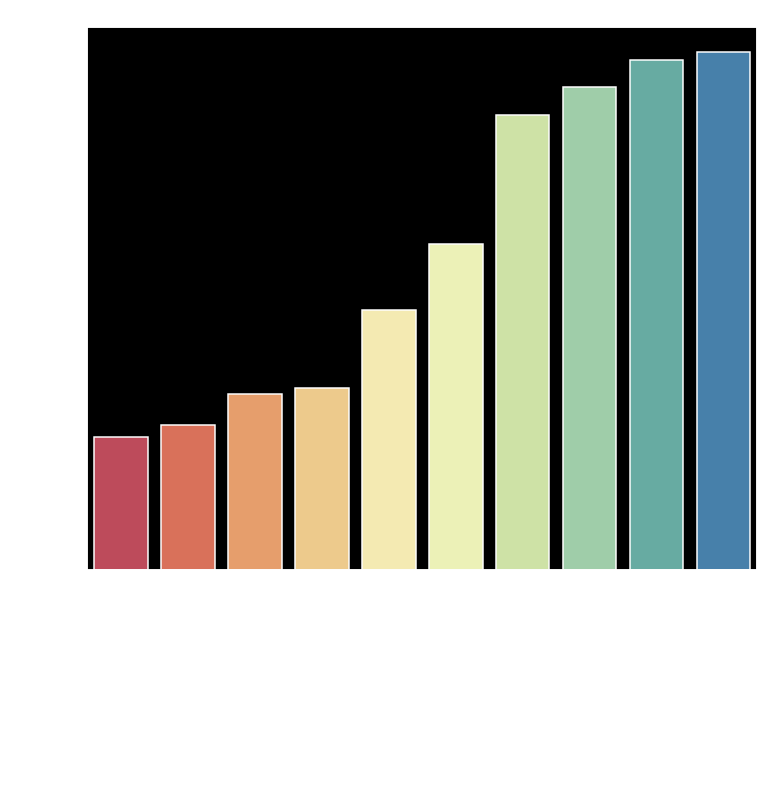

In [26]:
edu_edu['tot_sal'] = edu_edu['Income']*edu_edu['Total']
edu_edu_g = edu_edu.groupby('Education Level').sum().reset_index()
edu_edu_g['avg_sal'] =edu_edu_g['tot_sal']/edu_edu_g['Total']
edu_edu_g = edu_edu_g[edu_edu_g['Education Level'] != 'Total']
edu_edu_g = edu_edu_g.sort_values(by='avg_sal')

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(y = 'avg_sal',data = edu_edu_g,x = 'Education Level',palette ='Spectral').set_title('Mean Income of Education levels')

plt.ylabel('Income')
plt.xlabel('Education level')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

We can verify the previous statement that education is a strong driver of income. There is a large difference between the mean income of different education levels. There is a positive relation ship with the level of education and income. To dive a bit deeper into the data, I included provinces to see if it has an affect on this relationship.

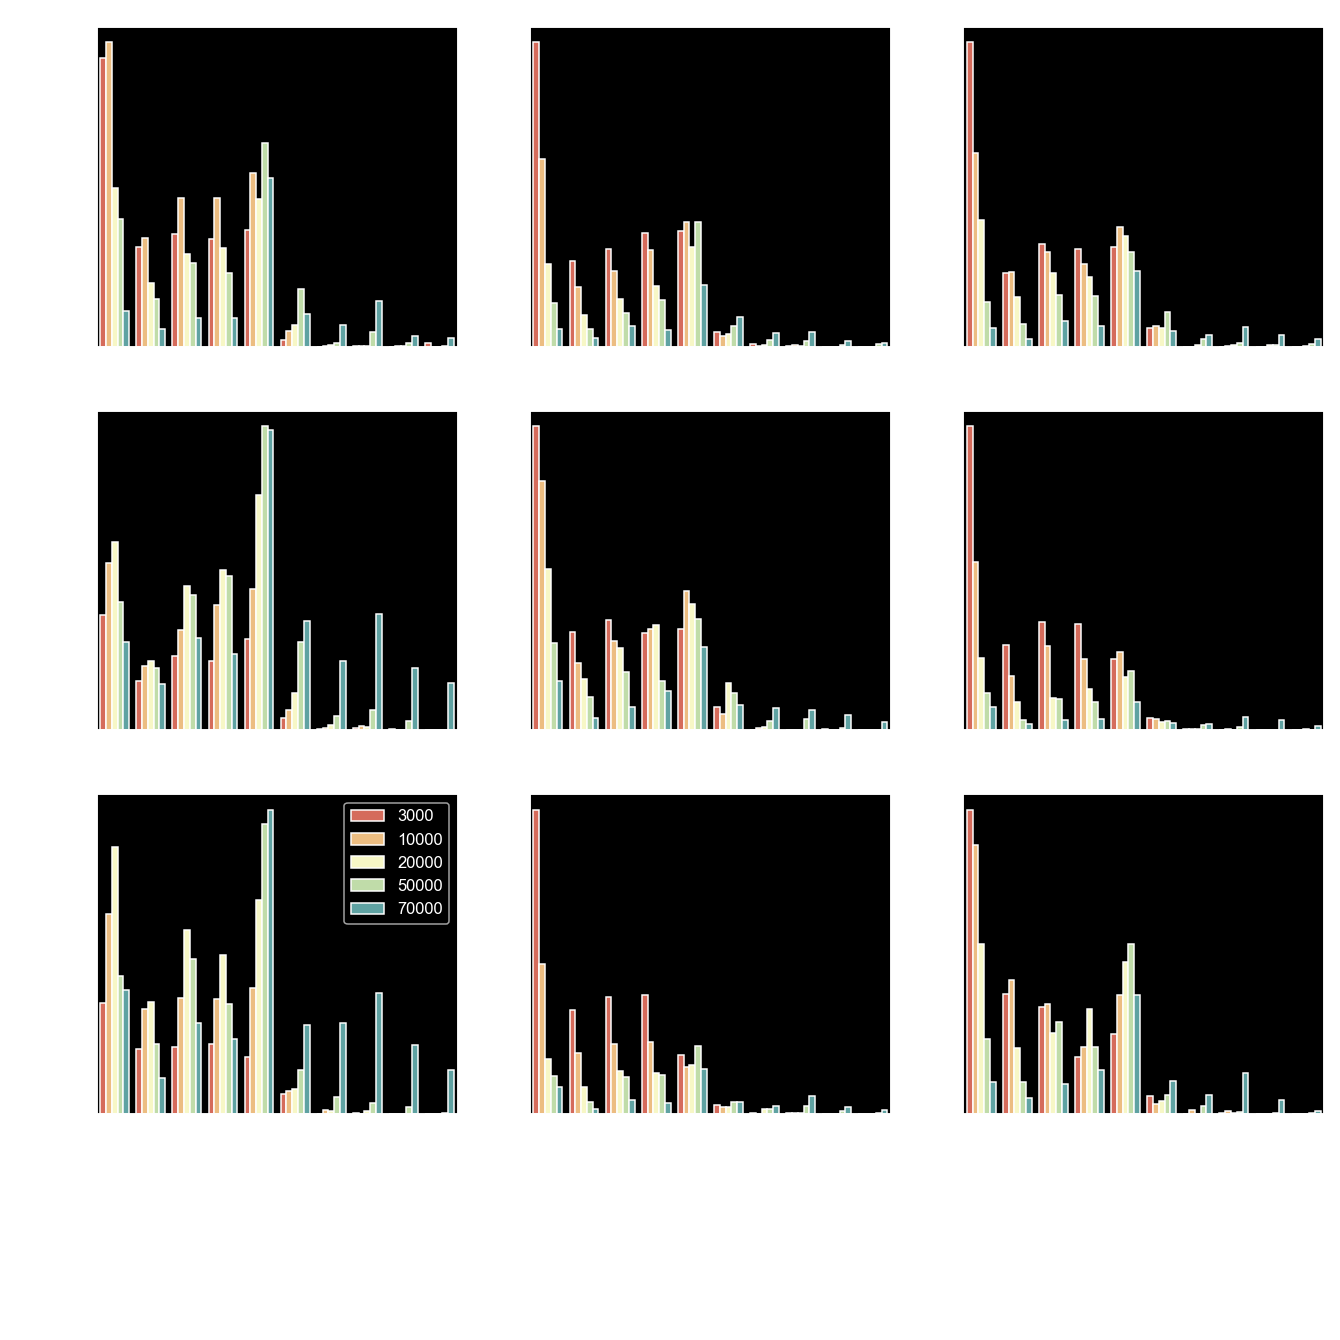

In [27]:
fig , ax = plt.subplots(3,3,figsize = (22,20),sharex=True)

order = ['No schooling','Grade 7','Grade 10','Grade 11','Grade 12 (no exemption)','Grade 12 (exemption)','Higher Diploma','Bachelors Degree','Honours Degree','Higher Degree']

sns.barplot(x = 'Education Level' , y = 'Free State',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[0][0],order = order).set_title('Free State')

sns.barplot(x = 'Education Level' , y = 'KwaZulu-Natal',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[0][1],order = order).set_title('KwaZulu-Natal')

sns.barplot(x = 'Education Level' , y = 'North West',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[0][2],order = order).set_title('North West')

sns.barplot(x = 'Education Level' , y = 'Gauteng',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[1][0],order = order).set_title('Gauteng')

sns.barplot(x = 'Education Level' , y = 'Mpumalanga',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[1][1],order = order).set_title('Mpumalanga')

sns.barplot(x = 'Education Level' , y = 'Limpopo',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[1][2],order = order).set_title('Limpopo')

sns.barplot(x = 'Education Level' , y = 'Western Cape',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[2][0],order = order).set_title('Western Cape')

sns.barplot(x = 'Education Level' , y = 'Eastern Cape',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[2][1],order = order).set_title('Eastern Cape')

sns.barplot(x = 'Education Level' , y = 'Northern Cape',hue = 'Income',data = edu_norace,palette = 'Spectral',ax = ax[2][2],order = order).set_title('Northern Cape')


ax[0][1].set_xlabel('')
ax[0][2].set_xlabel('')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[1][1].set_xlabel('')
ax[1][2].set_xlabel('')

ax[0][1].set_ylabel('')
ax[0][2].set_ylabel('')
ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')
ax[1][2].set_ylabel('')
ax[2][0].set_ylabel('Number of Respondents')
ax[2][1].set_ylabel('')
ax[2][2].set_ylabel('')

for axs in fig.axes:
    plt.sca(axs)
    plt.xticks(rotation=90)
    axs.get_legend().set_visible(False)
    
ax[2][0].legend()

Although the provinces contain different distributions of the education levels, higher education levels remains dominated by individuals in the high income category. The two outliers are once again Western Cape and Gauteng. In these provinces there are less uneducated people and the education level does not affect income as strongly as the others. 

We can conclude that a higher education level can contribute to higher income.

## Age
Age is naturally a factor that influences income. With age comes experience, education and oppertunities which all contributes to a higher salary. We have explored the age distribution at the start so we will directly include income in our analysis of the age groups. As before, this dataset is of the labour force, hence it will include people older than 15.

The distribution of income over each age group will prove useful. It should enable us to identify which age groups earn the highest income.


In [29]:
ad = pd.read_excel('lab_dyn_age_degree.xlsx')
ad = ad.fillna(method = 'ffill')
ad['Age Group'] = ad['Age Group'].apply(lambda x : x[4:])
ad['Salary category'] = ad['Salary category'].apply(lambda x : x[1:])

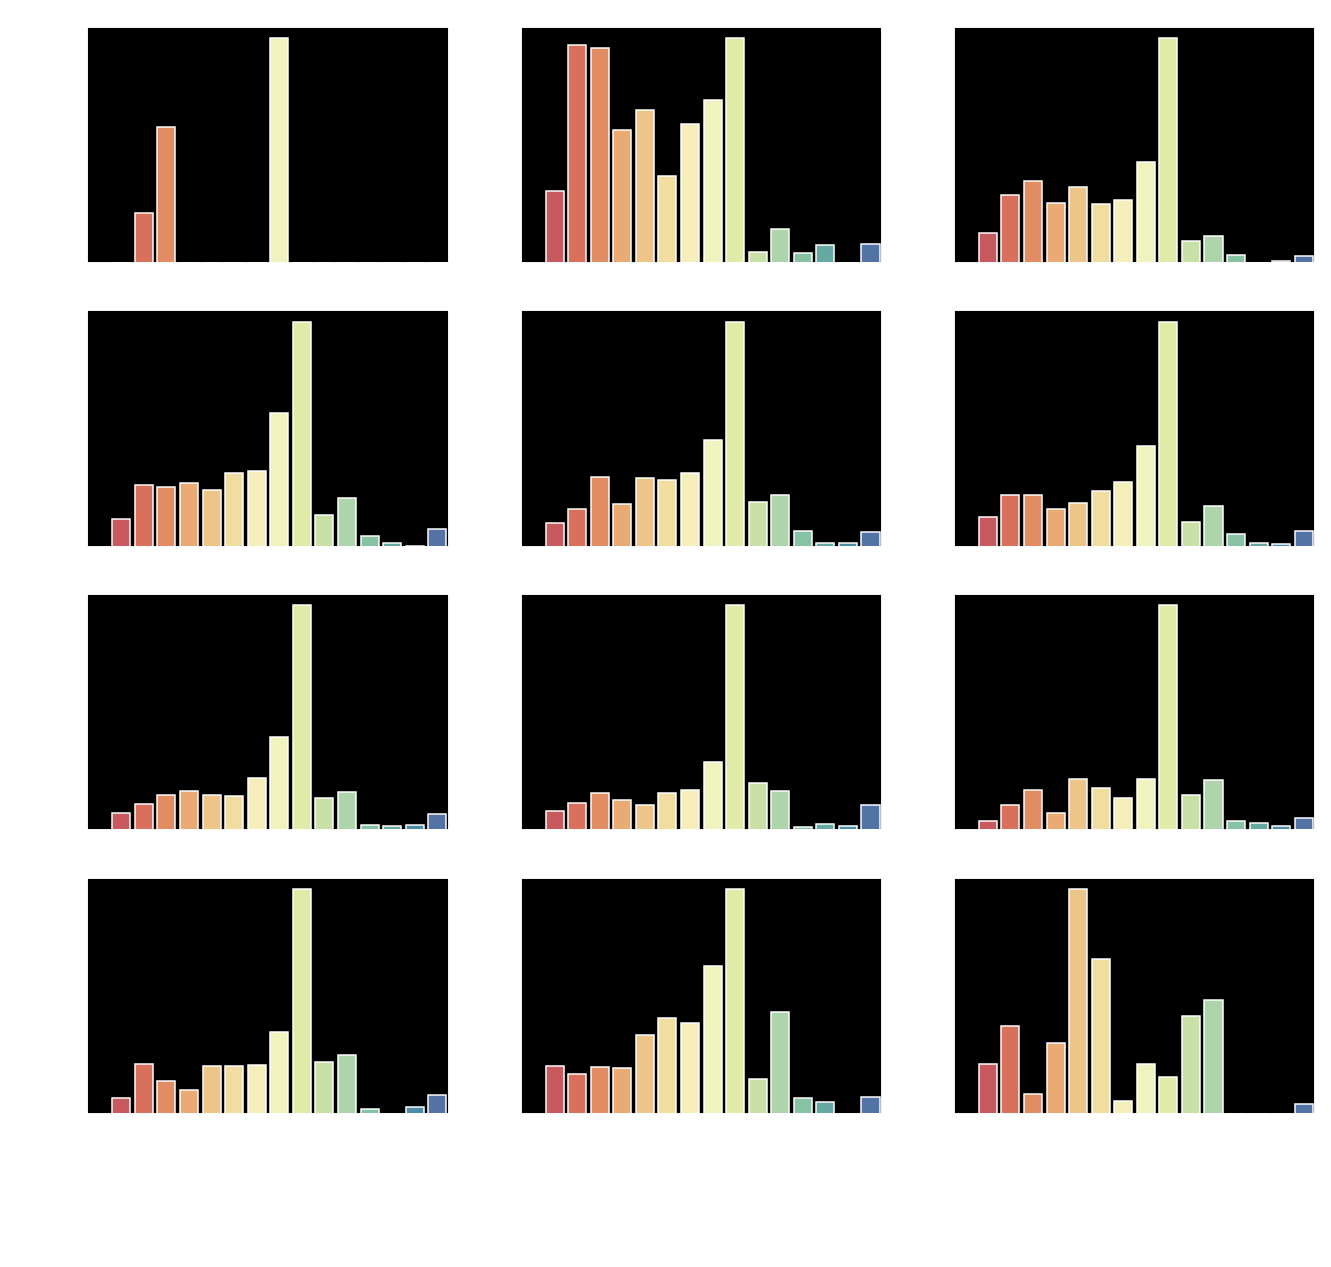

In [31]:
ad_age = ad.groupby(['Age Group','Salary category']).sum().reset_index()[['Age Group','Salary category','Total']]
ad_age = ad_age.pivot(index = 'Salary category',columns = 'Age Group').reset_index()
cols = ['Salary','15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+', 'Total']
ad_age.columns = ad_age.columns.droplevel()
ad_age.columns = cols
sal_odr = ['NONE','1 001 - R1 500', '1 501 - R2 500','2 501 - R3 500','3 501 - R4 500','4 501 - R6 000', '6 001 - R8 000', '8 001 - R11 000', '11 001 - R16 000', '16 001 - R30 000','30 001 - R37 500', '37 501 - R54 167',  '54 168 - R62 500','62 501- R70 800', '70 801 - R83 300', '83 301 OR MORE']
occ = cols[1:-1]


fig , ax = plt.subplots(4,3,figsize = (22,20),sharex=True)

sns.barplot(x = 'Salary' , y = occ[0],data = ad_age,palette = 'Spectral',ax = ax[0][0],order = sal_odr).set_title(occ[0])

sns.barplot(x = 'Salary' , y = occ[1],data = ad_age,palette = 'Spectral',ax = ax[0][1],order = sal_odr).set_title(occ[1])

sns.barplot(x = 'Salary' , y = occ[2],data = ad_age,palette = 'Spectral',ax = ax[0][2],order = sal_odr).set_title(occ[2])

sns.barplot(x = 'Salary' , y = occ[3],data = ad_age,palette = 'Spectral',ax = ax[1][0],order = sal_odr).set_title(occ[3])

sns.barplot(x = 'Salary' , y = occ[4],data = ad_age,palette = 'Spectral',ax = ax[1][1],order = sal_odr).set_title(occ[4])

sns.barplot(x = 'Salary' , y = occ[5],data = ad_age,palette = 'Spectral',ax = ax[1][2],order = sal_odr).set_title(occ[5])

sns.barplot(x = 'Salary' , y = occ[6],data = ad_age,palette = 'Spectral',ax = ax[2][0],order = sal_odr).set_title(occ[6])

sns.barplot(x = 'Salary' , y = occ[7],data = ad_age,palette = 'Spectral',ax = ax[2][1],order = sal_odr).set_title(occ[7])

sns.barplot(x = 'Salary' , y = occ[8],data = ad_age,palette = 'Spectral',ax = ax[2][2],order = sal_odr).set_title(occ[8])

sns.barplot(x = 'Salary' , y = occ[9],data = ad_age,palette = 'Spectral',ax = ax[3][0],order = sal_odr).set_title(occ[9])

sns.barplot(x = 'Salary' , y = occ[10],data = ad_age,palette = 'Spectral',ax = ax[3][1],order = sal_odr).set_title(occ[10])

sns.barplot(x = 'Salary' , y = occ[11],data = ad_age,palette = 'Spectral',ax = ax[3][2],order = sal_odr).set_title(occ[11])


ax[0][1].set_xlabel('')
ax[0][2].set_xlabel('')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[1][1].set_xlabel('')
ax[1][2].set_xlabel('')
ax[2][0].set_xlabel('')
ax[2][1].set_xlabel('')
ax[2][2].set_xlabel('')
ax[3][0].set_xlabel('')
ax[3][1].set_xlabel('')
ax[3][2].set_xlabel('')


ax[0][1].set_ylabel('')
ax[0][2].set_ylabel('')
ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')
ax[1][2].set_ylabel('')
ax[2][0].set_ylabel('')
ax[2][1].set_ylabel('')
ax[2][2].set_ylabel('')
ax[3][0].set_ylabel('# of People')
ax[3][1].set_ylabel('')
ax[3][2].set_ylabel('')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

For the age groups between 25-69, the distributions do not differ by much. They are all normally distributed with slight difference in terms of kurtosis and skewness, however they are all positively skewed. This does not provide as much information as I had wished.<br> Lets rather look at a simpler plot. Lets look at a summary of the plot above. The mean income per age group is displayed.

In [42]:
sal_map = {'ONE':0,'1 001 - R1 500':1250,'1 501 - R2 500':2000,'2 501 - R3 500':3000,'3 501 - R4 500':4000,'4 501 - R6 000':5250,'6 001 - R8 000':7000, '8 001 - R11 000':9500, '11 001 - R16 000':13500, '16 001 - R30 000':22500,'30 001 - R37 500':32500, '37 501 - R54 167':45000,'54 168 - R62 500':57500,'62 501- R70 800':66000,'70 801 - R83 300':77500,'83 301 OR MORE':85000}
ad['Age'] = ad['Age Group'].apply(lambda x : x[:2])
ad = ad[ad['Age'] != 'l']
ad['Age'] = ad['Age'].apply(lambda x :int(x))
ad['Sal'] = ad['Salary category'].map(sal_map)
ad['Sal'] = ad['Sal'].apply(lambda x :int(x))

ad_age = ad.groupby(['Sal','Age']).sum().reset_index()
ad_age_melt = ad_age.melt(id_vars = ['Sal','Age'])
ad_age_melt = ad_age_melt[ad_age_melt['variable'] != 'Total']
ad_age_melt['value'] = ad_age_melt['value'].apply(lambda x :float(x))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

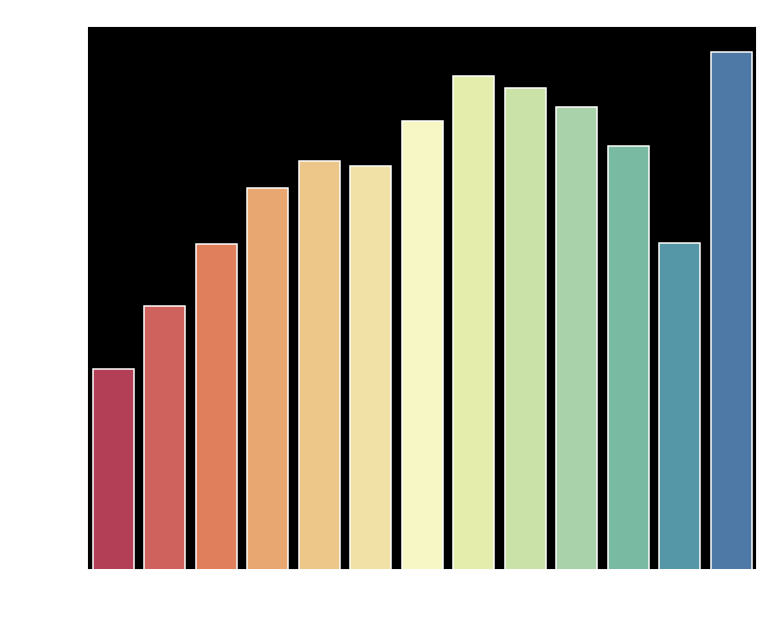

In [43]:
ad_age_melt_mean = ad_age_melt.groupby(['Age','Sal']).sum().reset_index()

ad_age_melt_mean['tot_sal'] = ad_age_melt_mean['Sal']*ad_age_melt_mean['value']
ad_age_melt_mean = ad_age_melt_mean.groupby('Age').sum().reset_index()#[['Age','value']]
ad_age_melt_mean['avg_sal'] =ad_age_melt_mean['tot_sal']/ad_age_melt_mean['value']


plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(x = 'Age',data = ad_age_melt_mean,y = 'avg_sal',palette ='Spectral').set_title('Mean Income of Age Groups')

plt.ylabel('Mean Income')
#plt.xlabel('Age Group')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

This graph does clear up some confusion that was present in the previous one. We see and initial increase in salary but the a decrease as people age. This could be due to people retiring or even the lack of ability to perform physical labour. This cause of this is not in the scope of this exploration. We can conclude by saying that middle aged people (45 - 55) earn the most.

Since plot above was rather basic, we could not gather much information from it. Drawn below are 4 percintiles (20%, 40%, 60% and 80%) of income per age group. The bottom line indicates how much the poorest 20% of each age group earn and the top line indicates how much the richest 20% of each age group earns.

(15, 70.0)

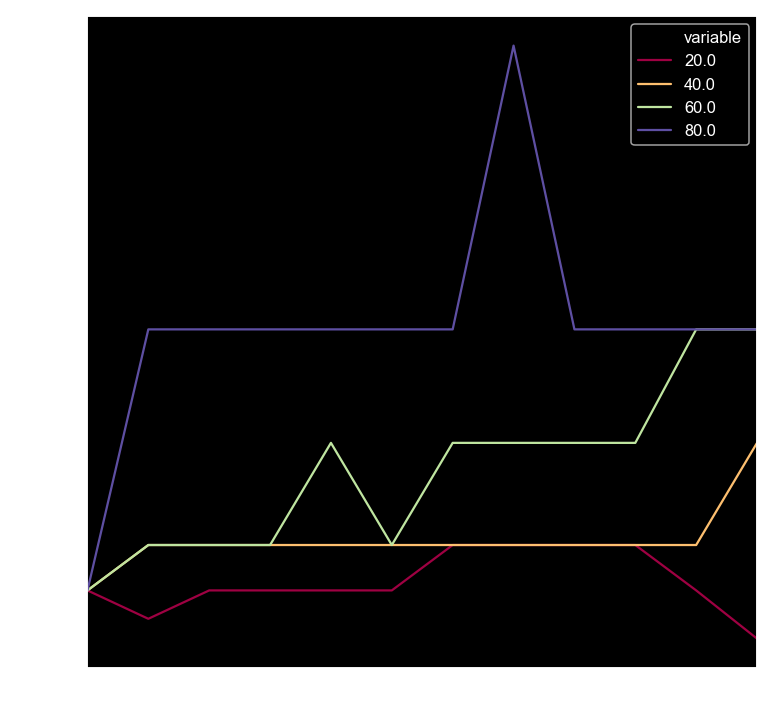

In [46]:
age_g = ad_age[['Sal','Age','Total']]
age_g['tot_sal'] = age_g['Sal']*age_g['Total']
age_g_m = age_g.groupby(['Age','Sal']).sum().reset_index()

age_g_q = age_g.groupby(['Age','Sal']).sum().groupby(level = [0]).cumsum().reset_index()
#age_g_q['perc'] = age_g_q['tot_sal']/(age_g_q.groupby('Age').sum()['tot_sal'])
yy1 = age_g_q.groupby('Age')['tot_sal'].apply(lambda y : 100*y/float(y.sum())).reset_index()

#age_g_m['avg_sal'] = age_g_m['tot_sal']/age_g_m['Total']
def getQuants(df,q):
    d = {}
    d_q = []
    age_q =  []
    for row,g in df.groupby('Age'):
        d[row] = g
        max_tsal = d[row]['tot_sal'].max()
        d[row]['tot_sal'] = d[row]['tot_sal']/max_tsal
        quant = d[row][d[row]['tot_sal']<= q][-1:]
        age_q.append(float(row))
        d_q.append(float(quant.Sal.values))
    d = np.array(d_q)
    d = d.reshape((13,1))
    a = np.array(age_q)
    a = a.reshape((13,1))
    ad = np.concatenate((a,d),axis =1)
    ad_df = pd.DataFrame(ad,columns=['Age',str(q*100)])
    return ad_df

ad9 = getQuants(age_g_q,1)
ad8 = getQuants(age_g_q,0.8)
ad6 = getQuants(age_g_q,0.6)
ad4 = getQuants(age_g_q,0.4)
ad2 = getQuants(age_g_q,0.2)
ad1 = getQuants(age_g_q,0)


q_plot = pd.concat([ad2,ad4,ad6,ad8])
q_plot = q_plot.melt(id_vars = 'Age',value_vars = ['20.0','40.0','60.0','80.0']).dropna()
q_plot['variable'] = q_plot['variable'].apply(lambda x: float(x))

plt.figure(figsize = (12,12))
sns.lineplot(data = q_plot,x = 'Age',y = 'value',hue = 'variable',palette = 'Spectral')
plt.xlim(right = 70)
plt.xlim(left = 15)

Our data is unfortunately discrete, hence the rigidity nature of the lines. We see that there is a large gap between the 80th percentile and the 60th percentile. This is another sign of South Africa's large inequality. The 20th and 40th percentile lines do not vary too much either, which implies that age amongst the lower 40% does not affect income strongly. The 60th and 80th percentile lines do increase. So for people in the top 40%, age does have a role.<br>

<br>

We have thoroughly explored the factors of concern. Our initial guess was that *older white individuals in Gauteng with a higher degree earns the most*. When each factor was individually explored we found that individuals who possess these attributes earn the most:
1. **Race** : White
2. **Province** : Gauteng
3. **Education** :  Higher degree
4. **Age** : 45-55 y/o

Our initial guess was nearly correct. We can improve it by rephrasing it as *Middle aged white individuals in Gauteng with a higher degree earns the most*.



# Extra feature that will be used in the inference part
1. Occupation
2. Industry
3. Study Field

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

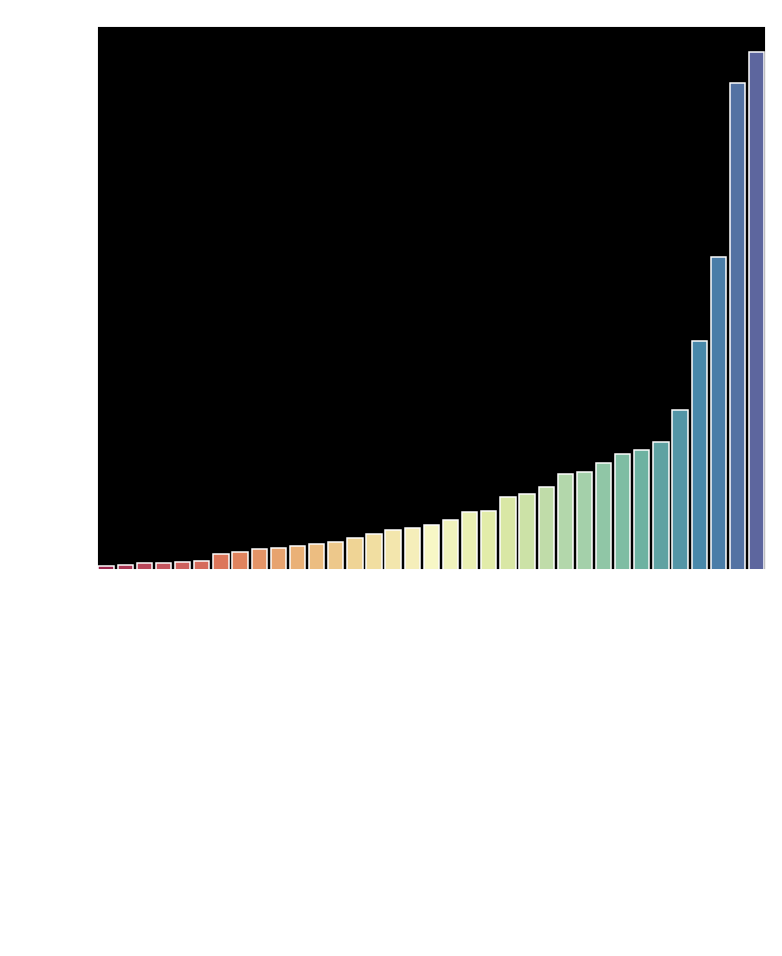

In [35]:
ad_deg = ad.groupby(['Study field','Sal']).sum().reset_index()[['Study field','Sal','Total']]

ad_deg_tot = ad_deg.groupby('Study field').sum().reset_index().sort_values(by='Total')
plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(x = 'Study field',data = ad_deg_tot,y = 'Total',palette ='Spectral').set_title('Total Respondents in Study Field')

plt.ylabel('# of Respondents')
#plt.xlabel('Study Field')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

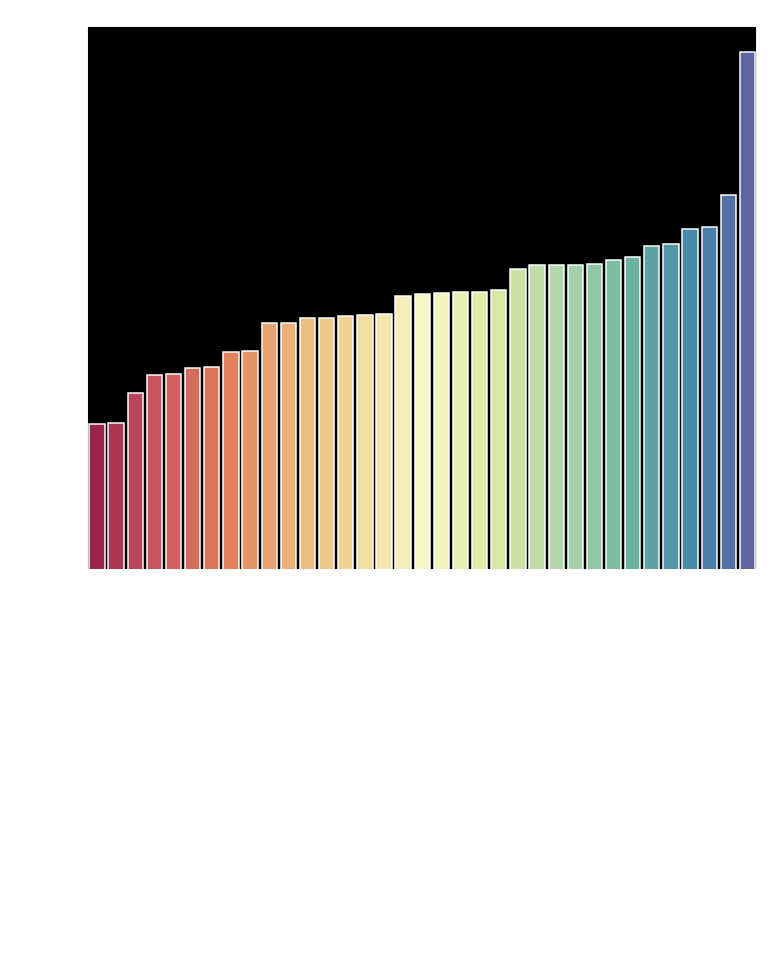

In [36]:
ad_deg_mean = ad.groupby(['Study field','Sal']).sum().reset_index()[['Study field','Sal','Total']]

ad_deg_mean['tot_sal'] = ad_deg_mean['Sal']*ad_deg_mean['Total']
ad_deg_mean = ad_deg_mean.groupby('Study field').sum().reset_index()
ad_deg_mean['avg_sal'] =ad_deg_mean['tot_sal']/ad_deg_mean['Total']
ad_deg_mean=ad_deg_mean.sort_values(by = 'avg_sal')

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(x = 'Study field',data = ad_deg_mean,y = 'avg_sal',palette ='Spectral').set_title('Mean Income of Study Fields')

plt.ylabel('Mean Income')
#plt.xlabel('Study Fields')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

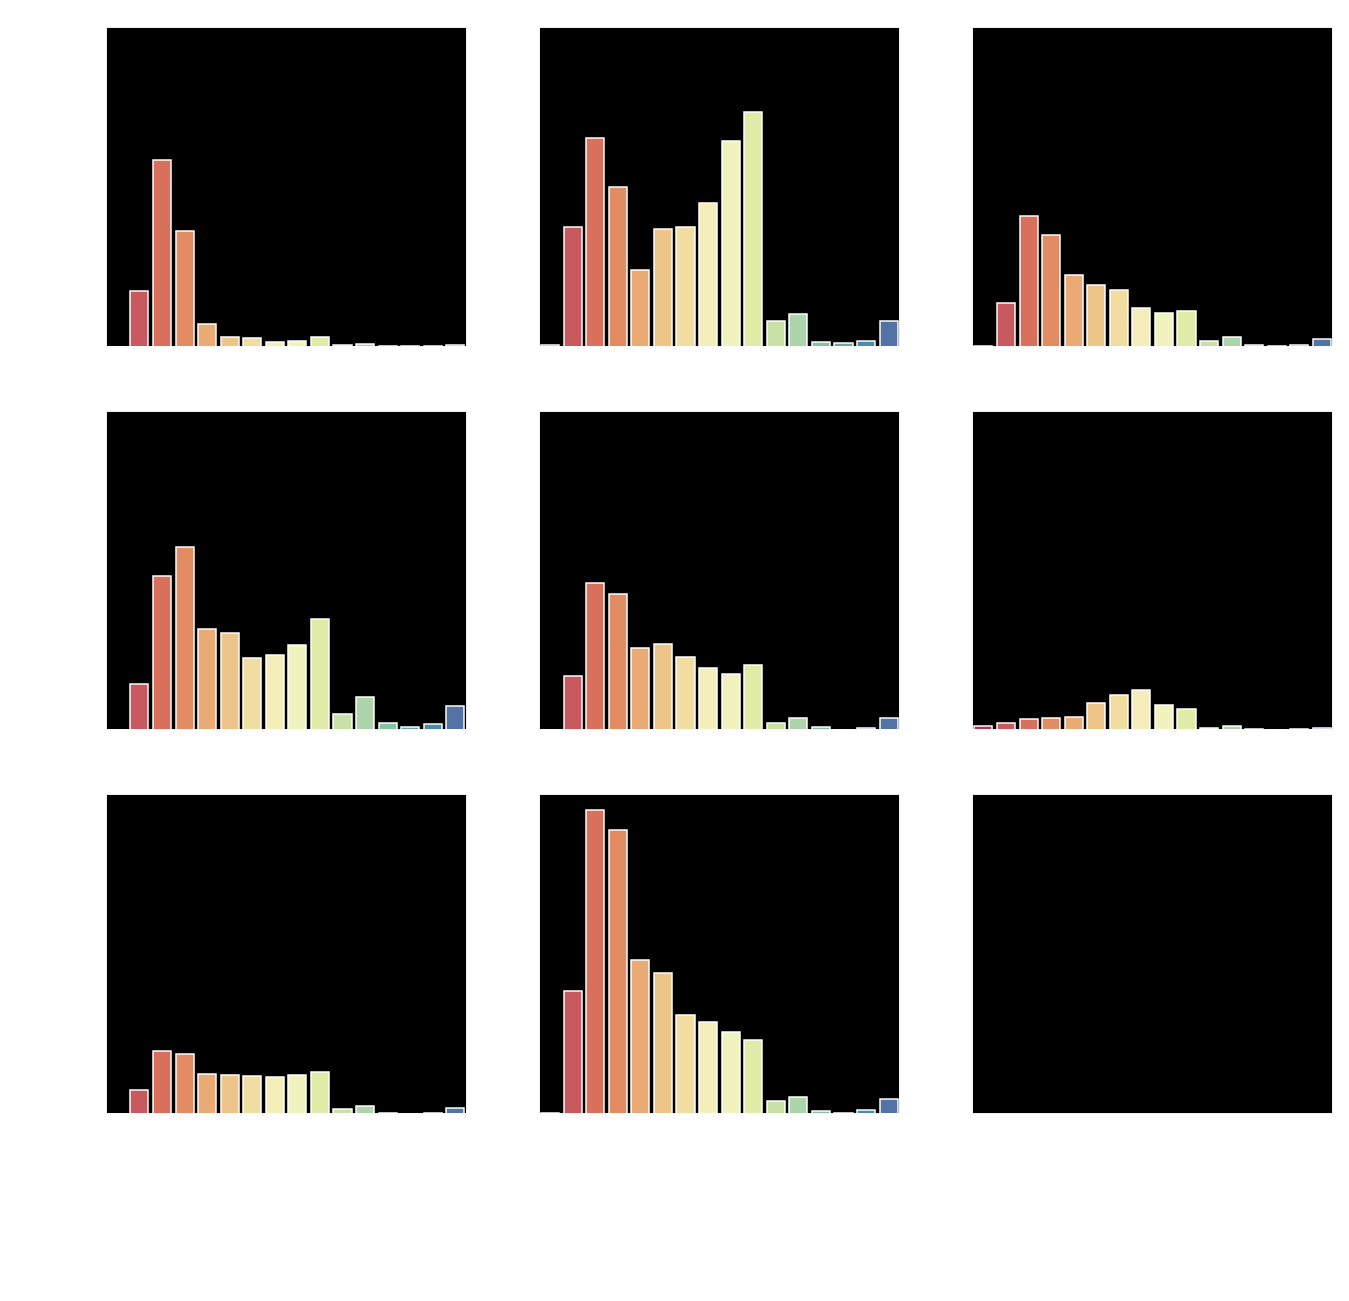

In [37]:
lab = pd.read_excel('labour_dynamics.xls')
lab = lab.fillna(method = 'ffill')
lab_inds = lab.groupby(['Salary','Industry']).sum().reset_index()[['Salary','Industry','Total']]
lab_inds = lab_inds.pivot(index = 'Salary',columns = 'Industry').reset_index()
lab_inds.columns = lab_inds.columns.droplevel() 
cols = ['Salary', 'Agriculture; hunting; forestry and fishing','Community; social and personal services', 'Construction','Financial intermediation; insurance; real estate and business services','Manufacturing', 'Mining and quarrying','Transport; storage and communication', 'Wholesale and retail trade']
lab_inds.columns = cols
sal_odr = ['NONE','R1 001 - R1 500','R1 501 - R2 500','R2 501 - R3 500','R3 501 - R4 500','R4 501 - R6 000','R6 001 - R8 000','R8 001 - R11 000','R11 001 - R16 000','R16 001 - R30 000','R30 001 - R37 500','R37 501 - R54 167','R54 168 - R62 500','R62 501- R70 800','R70 801 - R83 300','R83 301 OR MORE']
ind = ['Agriculture; hunting; forestry and fishing','Community; social and personal services','Construction','Financial intermediation; insurance; real estate and business services','Manufacturing','Mining and quarrying','Transport; storage and communication','Wholesale and retail trade']



fig , ax = plt.subplots(3,3,figsize = (22,20),sharex=True,sharey=True)

sns.barplot(x = 'Salary' , y = ind[0],data = lab_inds,palette = 'Spectral',ax = ax[0][0],order = sal_odr).set_title(ind[0])

sns.barplot(x = 'Salary' , y = ind[1],data = lab_inds,palette = 'Spectral',ax = ax[0][1],order = sal_odr).set_title(ind[1])

sns.barplot(x = 'Salary' , y = ind[2],data = lab_inds,palette = 'Spectral',ax = ax[0][2],order = sal_odr).set_title(ind[2])

sns.barplot(x = 'Salary' , y = ind[3],data = lab_inds,palette = 'Spectral',ax = ax[1][0],order = sal_odr).set_title(ind[3])

sns.barplot(x = 'Salary' , y = ind[4],data = lab_inds,palette = 'Spectral',ax = ax[1][1],order = sal_odr).set_title(ind[4])

sns.barplot(x = 'Salary' , y = ind[5],data = lab_inds,palette = 'Spectral',ax = ax[1][2],order = sal_odr).set_title(ind[5])

sns.barplot(x = 'Salary' , y = ind[6],data = lab_inds,palette = 'Spectral',ax = ax[2][0],order = sal_odr).set_title(ind[6])

sns.barplot(x = 'Salary' , y = ind[7],data = lab_inds,palette = 'Spectral',ax = ax[2][1],order = sal_odr).set_title(ind[7])

#sns.barplot(x = 'Salary' , y = ind[7],data = lab_inds,palette = 'CMRmap',ax = ax[2][2],order = sal_odr).set_title('Northern Cape')


ax[0][1].set_xlabel('')
ax[0][2].set_xlabel('')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[1][1].set_xlabel('')
ax[1][2].set_xlabel('')

ax[0][1].set_ylabel('')
ax[0][2].set_ylabel('')
ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')
ax[1][2].set_ylabel('')
ax[2][0].set_ylabel('Number of Respondents')
ax[2][1].set_ylabel('')
ax[2][2].set_ylabel('')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

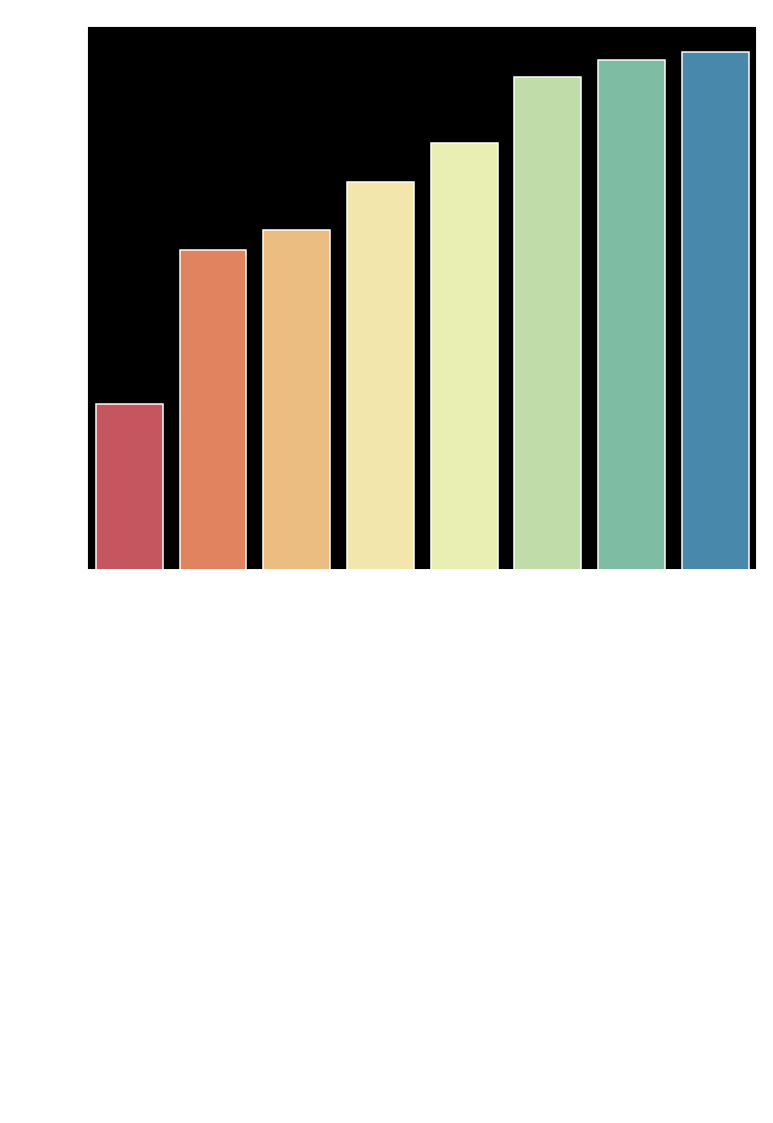

In [38]:
sal_map = {'NONE':0,'R1 001 - R1 500':1250,'R1 501 - R2 500':2000,'R2 501 - R3 500':3000,'R3 501 - R4 500':4000,'R4 501 - R6 000':5250,'R6 001 - R8 000':7000, 'R8 001 - R11 000':9500, 'R11 001 - R16 000':13500, 'R16 001 - R30 000':22500,'R30 001 - R37 500':32500, 'R37 501 - R54 167':45000,'R54 168 - R62 500':57500,'R62 501- R70 800':66000,'R70 801 - R83 300':77500,'R83 301 OR MORE':85000}
lab_inds['Sal'] = lab_inds['Salary'].map(sal_map)
lab_inds_melt = lab_inds.melt(id_vars = ['Sal','Salary'])

lab_inds_melt['tot_sal'] = lab_inds_melt['Sal']*lab_inds_melt['value']
lab_inds_melt_g = lab_inds_melt.groupby('variable').sum().reset_index()
lab_inds_melt_g['avg_sal'] =lab_inds_melt_g['tot_sal']/lab_inds_melt_g['value']
#lab_inds_melt_g = lab_inds_melt_g[lab_inds_melt_g['variable'] != 'Total']
lab_inds_melt_g = lab_inds_melt_g.sort_values(by='avg_sal')






plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(y = 'avg_sal',data = lab_inds_melt_g,x = 'variable',palette ='Spectral').set_title('Mean Income of Industry')

plt.ylabel('Income')
#plt.xlabel('Industry')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)


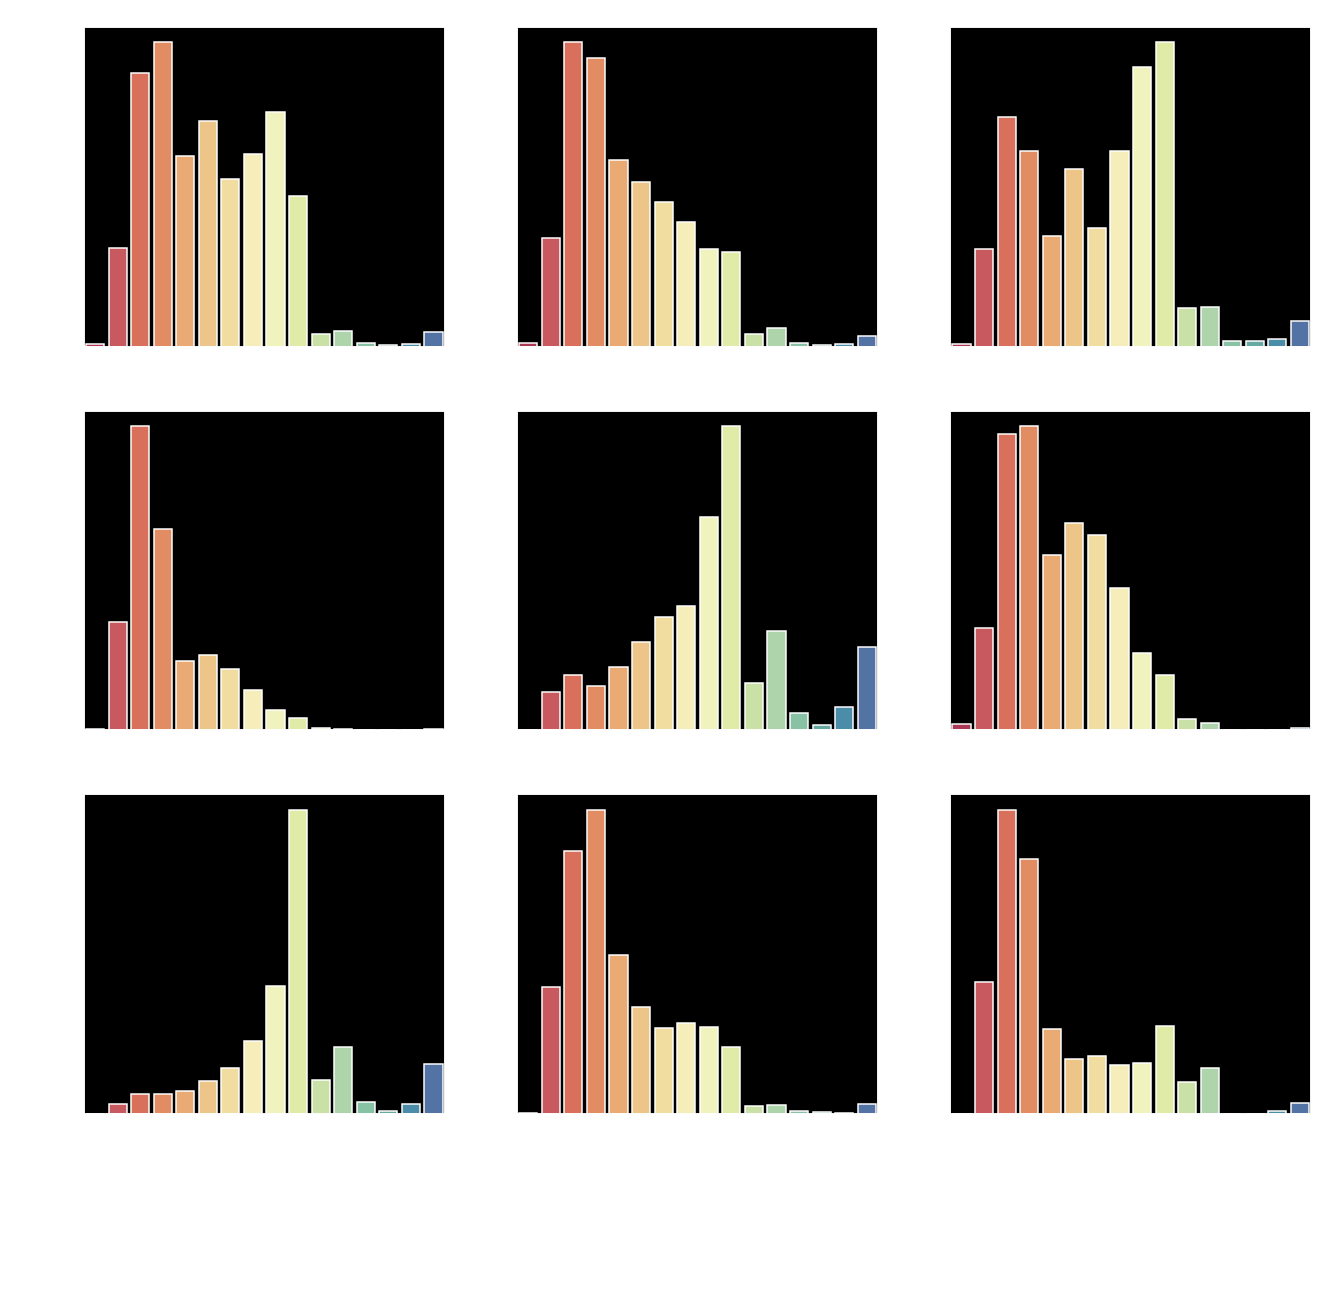

In [39]:
lab_occ = lab.groupby(['Salary','Occupation']).sum().reset_index()[['Salary','Occupation','Total']]
lab_occ = lab_occ.pivot(index = 'Salary',columns = 'Occupation').reset_index()
lab_occ.columns = lab_occ.columns.droplevel() 
cols = ['Salary', 'Legislators; senior officials and managers', 'Professionals', 'Technical and associate professionals', 'Service workers and shop and market sales workers', 'Clerks', 'Skilled agricultural and fishery workers', 'Craft and related trades workers', 'Plant and machine operators and assemblers', 'Domestic workers', 'Elementary Occupation']
lab_occ.columns = cols
sal_odr = ['NONE','R1 001 - R1 500','R1 501 - R2 500','R2 501 - R3 500','R3 501 - R4 500','R4 501 - R6 000','R6 001 - R8 000','R8 001 - R11 000','R11 001 - R16 000','R16 001 - R30 000','R30 001 - R37 500','R37 501 - R54 167','R54 168 - R62 500','R62 501- R70 800','R70 801 - R83 300','R83 301 OR MORE']
occ = list(lab.Occupation)[:10]
lab_occ.head(20)






fig , ax = plt.subplots(3,3,figsize = (22,20),sharex=True,)

sns.barplot(x = 'Salary' , y = occ[0],data = lab_occ,palette = 'Spectral',ax = ax[0][0],order = sal_odr).set_title(occ[0])

sns.barplot(x = 'Salary' , y = occ[1],data = lab_occ,palette = 'Spectral',ax = ax[0][1],order = sal_odr).set_title(occ[1])

sns.barplot(x = 'Salary' , y = occ[9],data = lab_occ,palette = 'Spectral',ax = ax[0][2],order = sal_odr).set_title(occ[9])

sns.barplot(x = 'Salary' , y = occ[3],data = lab_occ,palette = 'Spectral',ax = ax[1][0],order = sal_odr).set_title(occ[3])

sns.barplot(x = 'Salary' , y = occ[4],data = lab_occ,palette = 'Spectral',ax = ax[1][1],order = sal_odr).set_title(occ[4])

sns.barplot(x = 'Salary' , y = occ[5],data = lab_occ,palette = 'Spectral',ax = ax[1][2],order = sal_odr).set_title(occ[5])

sns.barplot(x = 'Salary' , y = occ[6],data = lab_occ,palette = 'Spectral',ax = ax[2][0],order = sal_odr).set_title(occ[6])

sns.barplot(x = 'Salary' , y = occ[7],data = lab_occ,palette = 'Spectral',ax = ax[2][1],order = sal_odr).set_title(occ[7])

sns.barplot(x = 'Salary' , y = occ[8],data = lab_occ,palette = 'Spectral',ax = ax[2][2],order = sal_odr).set_title(occ[8])


ax[0][1].set_xlabel('')
ax[0][2].set_xlabel('')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[1][1].set_xlabel('')
ax[1][2].set_xlabel('')

ax[0][1].set_ylabel('')
ax[0][2].set_ylabel('')
ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')
ax[1][2].set_ylabel('')
ax[2][0].set_ylabel('')
ax[2][1].set_ylabel('')
ax[2][2].set_ylabel('')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    

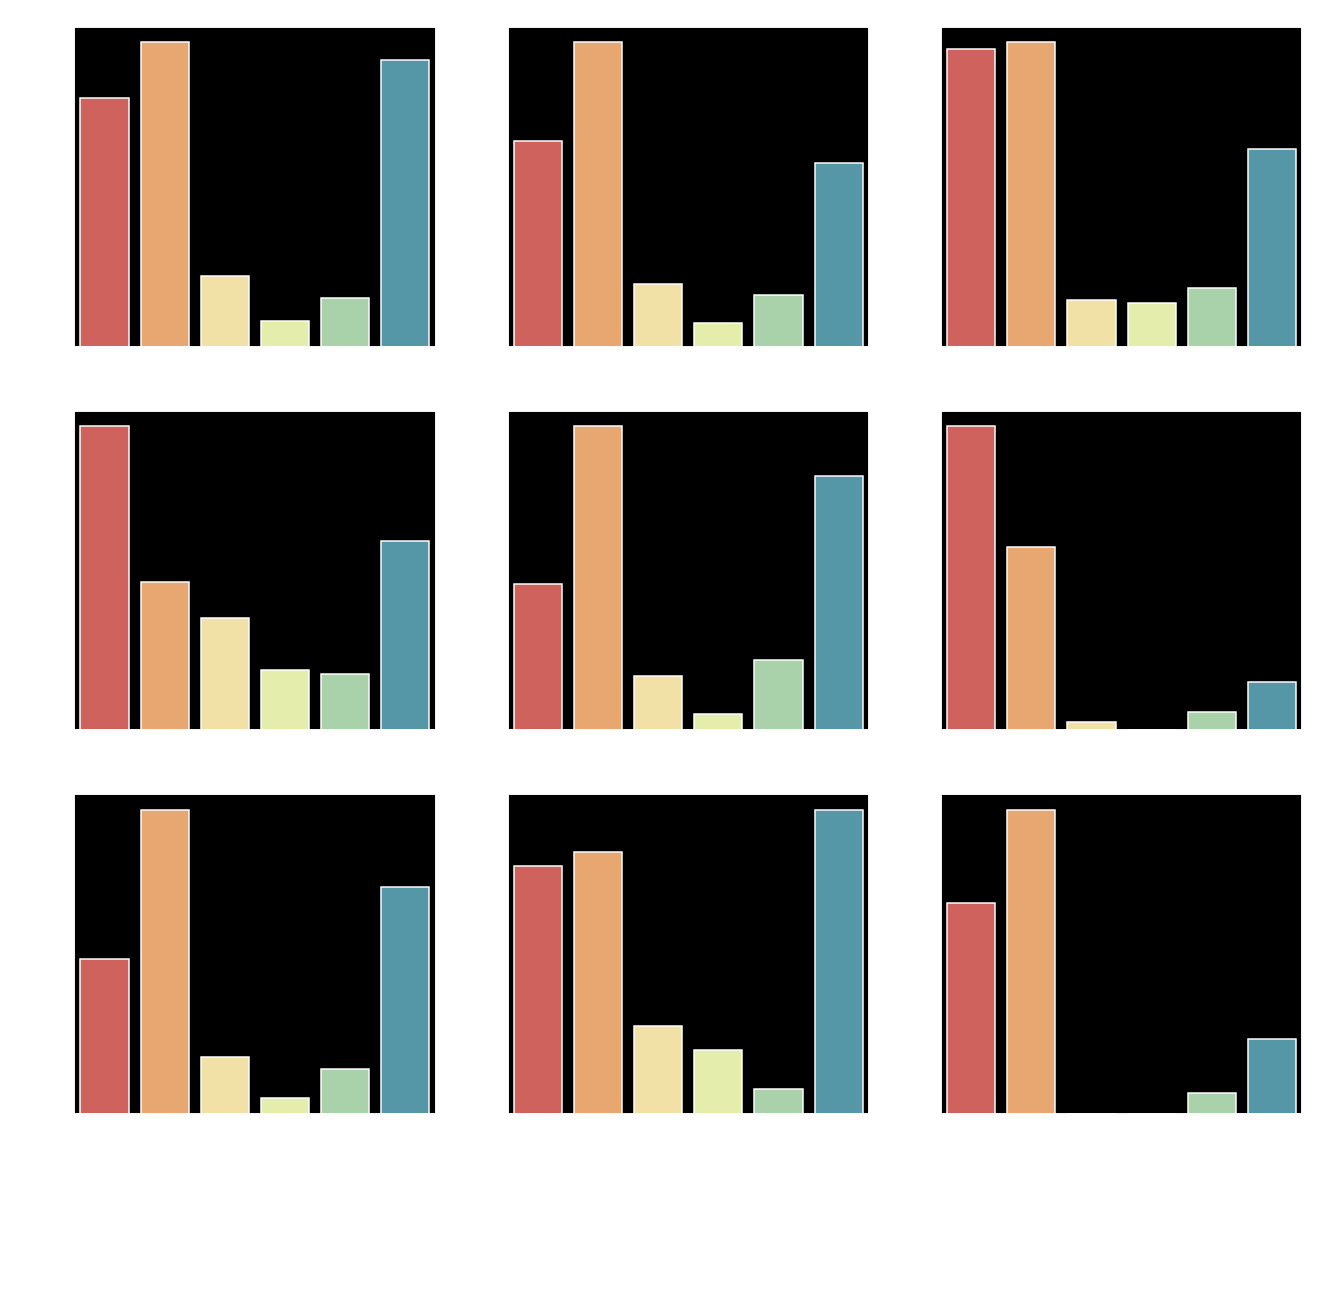

In [40]:

lab_occ_1 = lab.groupby(['Salary','Occupation']).sum().reset_index()[['Salary','Occupation','Total']]
lab_occ_1 = lab_occ_1.pivot(index = 'Salary',columns = 'Occupation').reset_index()
lab_occ_1.columns = lab_occ_1.columns.droplevel() 
cols = ['Salary', 'Legislators; senior officials and managers', 'Professionals', 'Technical and associate professionals', 'Service workers and shop and market sales workers', 'Clerks', 'Skilled agricultural and fishery workers', 'Craft and related trades workers', 'Plant and machine operators and assemblers', 'Domestic workers', 'Elementary Occupation']
lab_occ_1.columns = cols
sal_odr = ['R30 001 - R37 500','R37 501 - R54 167','R54 168 - R62 500','R62 501- R70 800','R70 801 - R83 300','R83 301 OR MORE']
occ = list(lab.Occupation)[:10]


fig , ax = plt.subplots(3,3,figsize = (22,20),sharex=True)

sns.barplot(x = 'Salary' , y = occ[0],data = lab_occ_1,palette = 'Spectral',ax = ax[0][0],order = sal_odr).set_title(occ[0])

sns.barplot(x = 'Salary' , y = occ[1],data = lab_occ_1,palette = 'Spectral',ax = ax[0][1],order = sal_odr).set_title(occ[1])

sns.barplot(x = 'Salary' , y = occ[9],data = lab_occ_1,palette = 'Spectral',ax = ax[0][2],order = sal_odr).set_title(occ[9])

sns.barplot(x = 'Salary' , y = occ[3],data = lab_occ_1,palette = 'Spectral',ax = ax[1][0],order = sal_odr).set_title(occ[3])

sns.barplot(x = 'Salary' , y = occ[4],data = lab_occ_1,palette = 'Spectral',ax = ax[1][1],order = sal_odr).set_title(occ[4])

sns.barplot(x = 'Salary' , y = occ[5],data = lab_occ_1,palette = 'Spectral',ax = ax[1][2],order = sal_odr).set_title(occ[5])

sns.barplot(x = 'Salary' , y = occ[6],data = lab_occ_1,palette = 'Spectral',ax = ax[2][0],order = sal_odr).set_title(occ[6])

sns.barplot(x = 'Salary' , y = occ[7],data = lab_occ_1,palette = 'Spectral',ax = ax[2][1],order = sal_odr).set_title(occ[7])

sns.barplot(x = 'Salary' , y = occ[8],data = lab_occ_1,palette = 'Spectral',ax = ax[2][2],order = sal_odr).set_title(occ[8])


ax[0][1].set_xlabel('')
ax[0][2].set_xlabel('')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[1][1].set_xlabel('')
ax[1][2].set_xlabel('')

ax[0][1].set_ylabel('')
ax[0][2].set_ylabel('')
ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')
ax[1][2].set_ylabel('')
ax[2][0].set_ylabel('')
ax[2][1].set_ylabel('')
ax[2][2].set_ylabel('')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

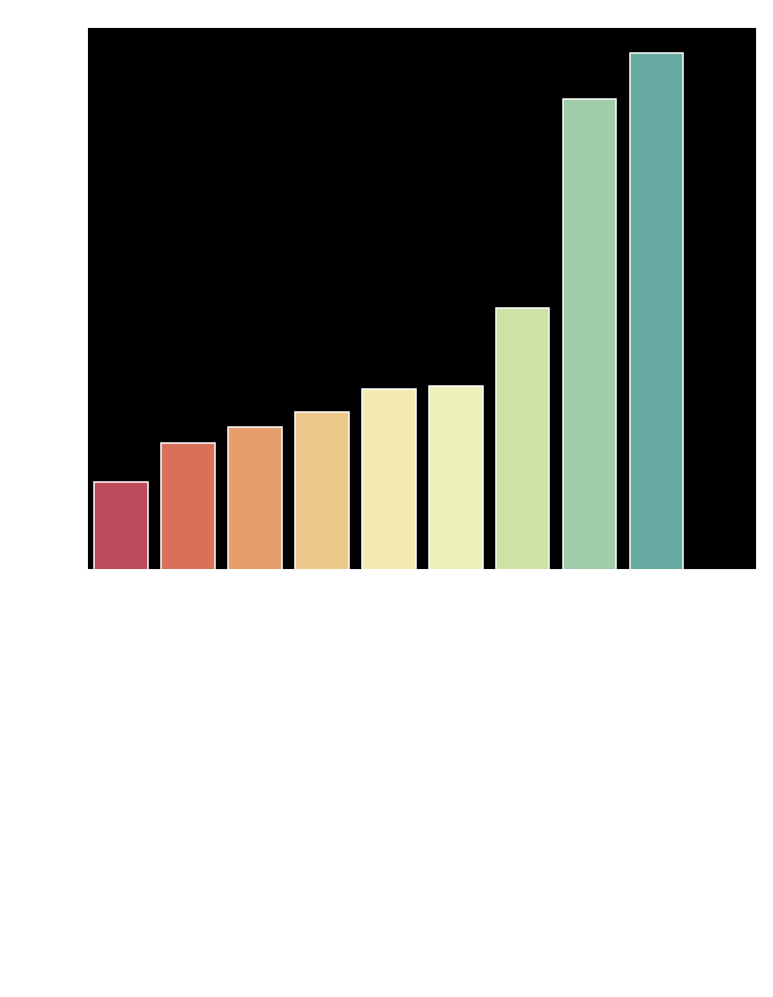

In [41]:
sal_map = {'NONE':0,'R1 001 - R1 500':1250,'R1 501 - R2 500':2000,'R2 501 - R3 500':3000,'R3 501 - R4 500':4000,'R4 501 - R6 000':5250,'R6 001 - R8 000':7000, 'R8 001 - R11 000':9500, 'R11 001 - R16 000':13500, 'R16 001 - R30 000':22500,'R30 001 - R37 500':32500, 'R37 501 - R54 167':45000,'R54 168 - R62 500':57500,'R62 501- R70 800':66000,'R70 801 - R83 300':77500,'R83 301 OR MORE':85000}
lab_occ['Sal'] = lab_occ['Salary'].map(sal_map)
lab_occ_melt = lab_occ.melt(id_vars = ['Sal','Salary'])

lab_occ_melt['tot_sal'] = lab_occ_melt['Sal']*lab_occ_melt['value']
lab_occ_melt_g = lab_occ_melt.groupby('variable').sum().reset_index()
lab_occ_melt_g['avg_sal'] =lab_occ_melt_g['tot_sal']/lab_occ_melt_g['value']
#lab_inds_melt_g = lab_inds_melt_g[lab_inds_melt_g['variable'] != 'Total']
lab_occ_melt_g = lab_occ_melt_g.sort_values(by='avg_sal')

plt.figure(figsize = (15,10))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
sns.barplot(y = 'avg_sal',data = lab_occ_melt_g,x = 'variable',palette ='Spectral').set_title('Mean Income of Occupation')

plt.ylabel('Income')
#plt.xlabel('Occupation')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)  